# Part I - Exploration of Prosper Loan Dataset
## by Joshua Ati

# Table of Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusion">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>


<a id='intro'></a>
## Introduction
Prosper is a personal loan pioneer — the company became the first firm to enter the peer-to-peer lending arena when it launched in 2005.
Prosper has originated more than $20 billion in personal loans by matching over 1,170,000 borrowers to potential investors through its online platform.
The Dataset has 81 Loan Variables and 113,937 Loan Observations

<a id="#wrangling"></a>
## Preliminary Wrangling
In this section, I analysed the data and performed some necessary cleaning.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

In [2]:
#setting the workbook to display all columns and row
#pd.set_option('display.max_column',None)
#pd.set_option('display.max_rows',None)

In [3]:
#loading the Dataset
loan = pd.read_csv('ProsperLoanData.csv')

#reading a sample of the Dataset
loan.sample(10)

ListingKey  ListingNumber            ListingCreationDate  \
61662   26C63590046649322739FC0         908487  2013-09-18 16:49:27.183000000   
95423   F6203507330575144E0B99B         494299  2011-02-17 11:03:35.773000000   
31692   C3043534519610789442D53         546464  2011-12-23 14:13:10.120000000   
27268   BC3A3583648432291ACE588         839023  2013-07-13 22:13:16.847000000   
106752  97DD3574371740744926A5C         736713  2013-03-24 07:37:15.220000000   
24345   FC743493383661988DED600         474597  2010-09-06 21:42:38.363000000   
12905   E2603495805287455BA2E21         476673  2010-09-23 14:14:46.987000000   
7330    5EB035973708216655E20E6        1048852  2013-12-11 16:29:08.503000000   
9908    A0D635177507151499B26B9         512501  2011-06-20 10:35:25.343000000   
31489   307C35907238910546B01EE         954245  2013-10-12 16:10:56.960000000   

       CreditGrade  Term  LoanStatus           ClosedDate  BorrowerAPR  \
61662          NaN    60     Current                  NaN      0.23318   
95423          NaN    36   Completed  2012-02-27 00:00:00      0.10375   
31692          NaN    36   Completed  2012-03-13 00:00:00      0.18478   
27268          NaN    36     Current                  NaN      0.24246   
106752         NaN    60     Current                  NaN      0.24589   
24345          NaN    36   Completed  2011-06-07 00:00:00      0.31463   
12905          NaN    36  Chargedoff  2011-10-06 00:00:00      0.38058   
7330           NaN    36     Current                  NaN      0.21342   
9908           NaN    36   Completed  2013-05-28 00:00:00      0.30532   
31489          NaN    36     Current                  NaN      0.08325   

        BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
61662         0.2085       0.1985  ...          -41.09               0.00   
95423         0.0829       0.0729  ...          -57.94               0.00   
31692         0.1559       0.1459  ...           -6.06               0.00   
27268         0.2049       0.1949  ...          -55.35               0.00   
106752        0.2209       0.2109  ...         -131.50               0.00   
24345         0.2750       0.2650  ...           -9.09               0.00   
12905         0.3435       0.3335  ...          -20.01            -256.29   
7330          0.1765       0.1665  ...          -16.00               0.00   
9908          0.2699       0.2599  ...          -51.27               0.00   
31489         0.0699       0.0599  ...          -38.91               0.00   

        LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
61662                    0.00                 0.00   
95423                    0.00                 0.00   
31692                    0.00                 0.00   
27268                    0.00                 0.00   
106752                   0.00                 0.00   
24345                    0.00                 0.00   
12905                 3897.05              3891.31   
7330                     0.00                 0.00   
9908                     0.00                 0.00   
31489                    0.00                 0.00   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
61662                             0.00            1.0                0   
95423                             0.00            1.0                0   
31692                             0.00            1.0                0   
27268                             0.00            1.0                0   
106752                            0.00            1.0                0   
24345                             0.00            1.0                0   
12905                           556.51            1.0                0   
7330                              0.00            1.0                0   
9908                              0.00            1.0                0   
31489                             0.00            1.0                0   

       InvestmentFromFriendsCount InvestmentFromFriendsA

In [4]:
#column, null count and datatype of the data
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#statistical description of the data
loan.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

### What is the structure of your dataset?

> The Dataset has 113,937 Loan Observations and 81 Loan Variables such as the Unique Loan Key, Occupation, State, Loan Status, Risk Score, Income Range, and many others.

### What is/are the main feature(s) of interest in your dataset?

> Without a clear business goal and a myriad of data variables, it is difficult to know what to focus on. However, I would be focusing on what affects the Interest Rate of the Borrower       

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Monthly loan payment, Loan original amount, Monthly income, Occupation, the Borrower's state, Rating, Investors
> The data is in Tidy format but has some Quality issues. I would be performing some data cleaning as necessary. I would be changing some data format and adjusting some information for easier exploration. Some columns won't be necessary for this visualization exercise however, I won't be dropping those. 

## Data Cleaning

In [6]:
#copying the original Dataset
loan_clean = loan.copy()

### Issue - Some columns have wrong DataTypes
### Define
- Change LoanStatus, ProsperRating, EmploymentStatus, IncomeRange to Categorical datatype
- Replace numeric and abbreviated data in ListingCategory and BorrowerState 
- Chang all date format data to datetime datatype 
### Code

In [7]:
#number of unique values in the income range column
loan_clean['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [8]:
#first replace the not displayed to $0 and change IncomeRange from integer to object
loan_clean['IncomeRange'].replace(['Not displayed', 'Not employed'], '$0', inplace = True)
loan_clean['EmploymentStatus'].replace('Not available', 'Other', inplace=True)
loan_clean['IncomeRange'] = loan_clean['IncomeRange'].astype('object')

In [9]:
#creating a dictionary of the categories in ordered form
corr_dict = {'LoanStatus' : ['Current', 'FinalPaymentInProgress', 'Completed', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 
                            'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)',
                            'Defaulted', 'Chargedoff', 'Cancelled'], 
            'ProsperRating (Alpha)' : ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],
            'EmploymentStatus' : ['Employed', 'Full-time', 'Part-time', 'Self-employed', 'Retired', 'Not employed', 'Other'],
            'IncomeRange': ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
}

#changing the data type to category
for col in corr_dict:
    cat_type = pd.api.types.CategoricalDtype(ordered = True, categories = corr_dict[col])
    loan_clean[col] = loan_clean[col].astype(cat_type)



In [10]:
#creating dictionaries for replacement
Listing_Category_repl = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other', 
                        8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 
                        15:'Medical/Dental', 16: 'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
State_repl = {
            'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut',
            'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
            'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan',
            'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
            'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
            'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas',
            'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming','DC': 'District of Columbia',
            'MP': 'Northern Mariana Islands', 'PW': 'Palau', 'PR': 'Puerto Rico', 'VI': 'Virgin Islands', 'AA': 'Armed Forces Americas (Except Canada)',
            'AE': 'Armed Forces Africa/Canada/Europe/Middle East', 'AP': 'Armed Forces Pacific'
        }

In [11]:
#replacing the data
loan_clean['ListingCategory (numeric)'].replace(Listing_Category_repl, inplace = True)
loan_clean['BorrowerState'].replace(State_repl, inplace = True)

#renaming the columns
loan_clean.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace = True)
loan_clean.rename(columns={'ProsperRating (Alpha)':'ProsperRating'}, inplace = True)

In [12]:
#changing all the date type columns to Datetime
col_list = ['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate']
for col in col_list:
    loan_clean[col] = loan_clean[col].astype('datetime64')

### Test

In [13]:
#number of unique values in the listing creation date column 
loan_clean['ListingCreationDate'].dt.year.value_counts()

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: ListingCreationDate, dtype: int64

In [14]:
#number of unique values in the listing category column 
loan_clean['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

In [15]:
#data type of the first recorded credit line column
loan_clean['FirstRecordedCreditLine'].dtype

dtype('<M8[ns]')

---

<a id="#univariate"></a>
## Univariate Exploration

> In this section, I investigated the distributions of individual variables. The variables I investigated are
> - Number of loans each year
> - Borrower's State
> - Listing Category
> - Income Range
> - Prosper Rating
> - Loan Status
> - Loan Term
> - Total Prosper Loans
> - Debt to Income Ratio
> - Monthly Loan Payment
> - Borrower's Interest Rate
> - Loan Amount 
> - Investor Number
> - Credit Score Range


In [16]:
#initializing Seaborn
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize": (15,15)})
plt_color = '#CC8963'
title_font = {'family': 'Clarendon BT', 'size': 17}
label_font = {'family': 'Century751 SeBd BT', 'size': 14}

In [17]:
#defining a vertical count graph plotting function
def Countpltx(x, title, xlabel, ylabel):
    '''This function plots vertical count graphs
    '''
    #arrange the bars in order of category
    count_a = x.value_counts().sort_index()
    count_b = x.value_counts(normalize = True).sort_index()*100

    #plot the count graph
    ax = sns.countplot(x = x, color = plt_color)

    #create the labels
    label = [f'{p[0]} | {p[1]:.2f}%' for p in zip(count_a, count_b)]
    ax.bar_label(container=ax.containers[0], labels=label)

    #display graph labels
    plt.title(title, fontdict = title_font)
    plt.xlabel(xlabel, fontdict = label_font)
    plt.ylabel(ylabel, fontdict = label_font)

In [18]:
#defining a horizontal count graph plotting function
def Countplty(y, title, xlabel, ylabel):
    '''This function plots horizontal count graphs
    '''
    #arrange the bars in order of frequency
    count_a = y.value_counts()
    count_b = y.value_counts(normalize = True)*100

    #plot the count graph
    ax = sns.countplot(y = y, order = count_a.index, color = plt_color)

    #create the labels
    label = [f' {p[0]} | {p[1]:.2f}%' for p in zip(count_a, count_b)]
    ax.bar_label(container=ax.containers[0], labels=label)
    
    #graph labels
    plt.title(title, fontdict = title_font)
    plt.xlabel(xlabel, fontdict = label_font)
    plt.ylabel(ylabel, fontdict = label_font)
    plt.xticks([])

### How many loans are created each year
To answer this question, I plotted a count graph showing the number of loans collected each year

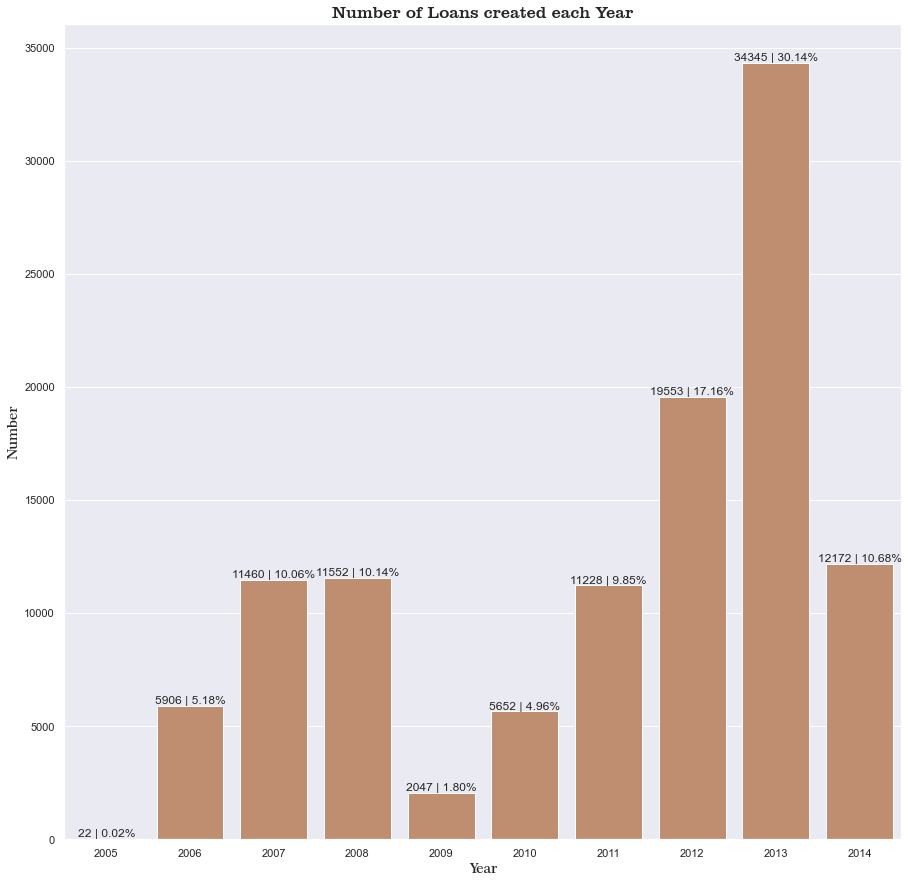

In [19]:
#count plot for loans created each year
Countpltx(loan_clean['LoanOriginationDate'].dt.year, "Number of Loans created each Year", "Year", "Number")

2013 had the highest number of loan collected by a very large margin. 2012 with the second highest number of loans collected had a difference of -13%. 2005 had the lowest number of loan collected. This may be due to when the data was collected. It would be safe to not count 2005 as the year with the lowest loan but 2009.

### Which state had the most borrowers?
The dataset is based in the United States. To answer the question, I made a count plot if the states the borrowers are from

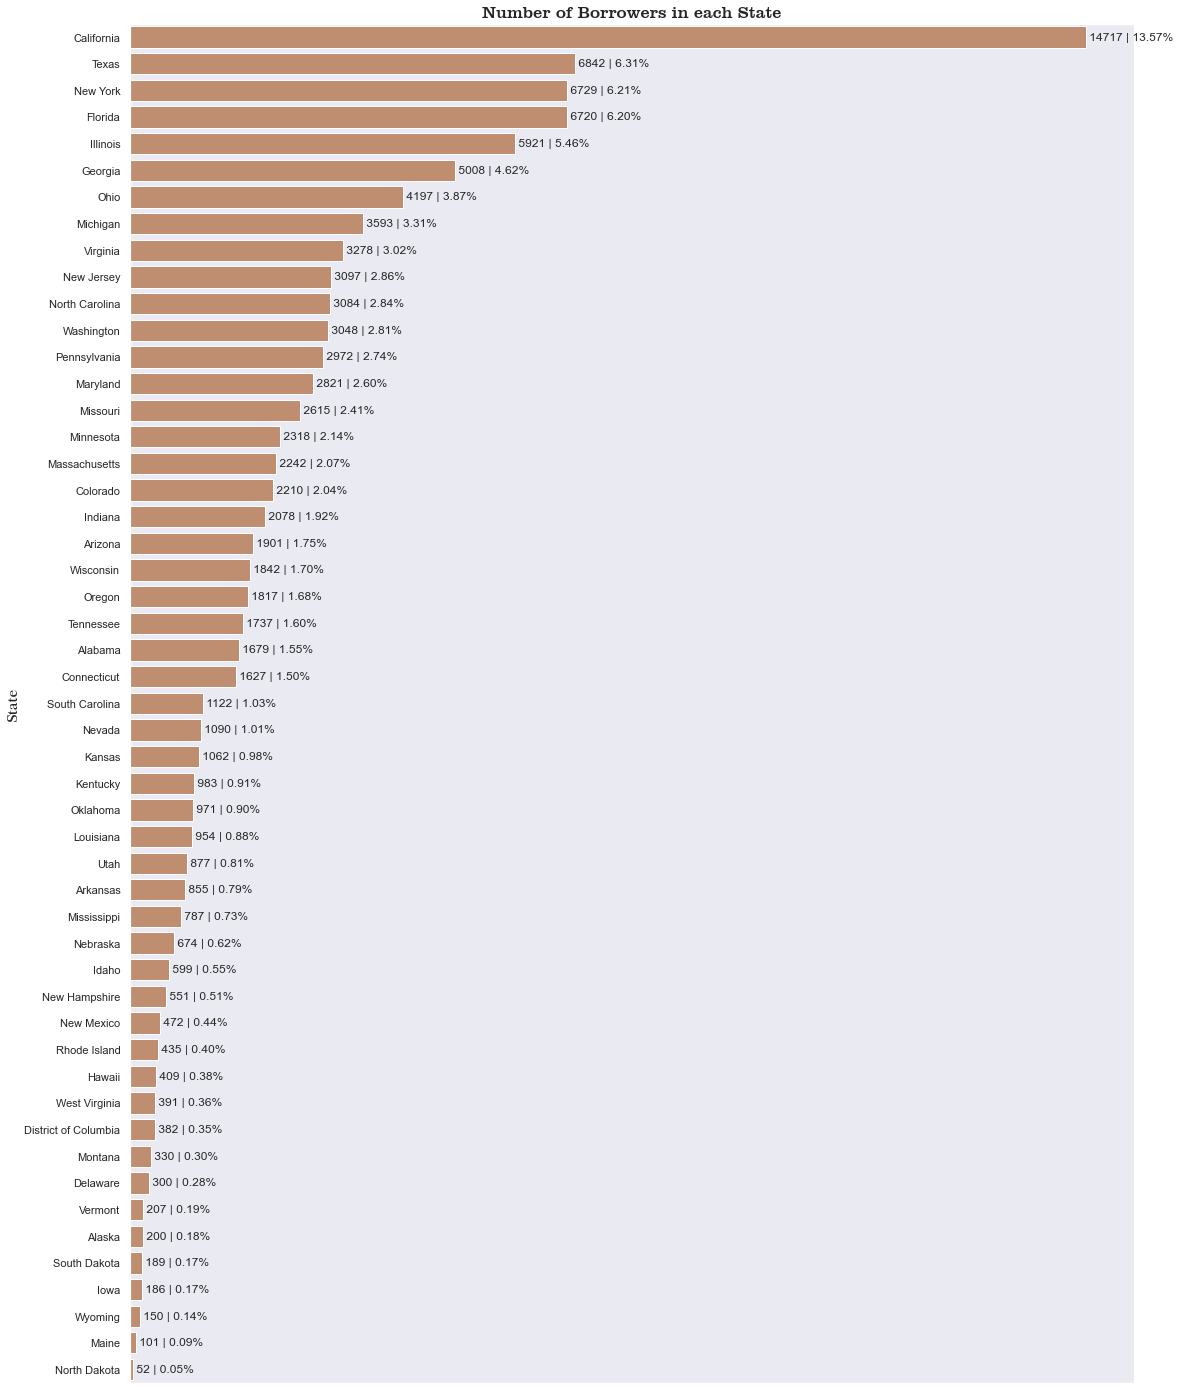

In [20]:
#set figure size
plt.figure(figsize=[18,25])

#count plot for borrowers in each state
Countplty(loan_clean['BorrowerState'], "Number of Borrowers in each State", '', "State")

The state with the most number of borrowers by a large margin is California which had more than 13% of the loans taken. The next state is Texas which had 6.3% of the total borrowers.

### What are the reasons for people taking loans?
To answer this, I first converted the listing category to their text form and made a count plot of the reasons

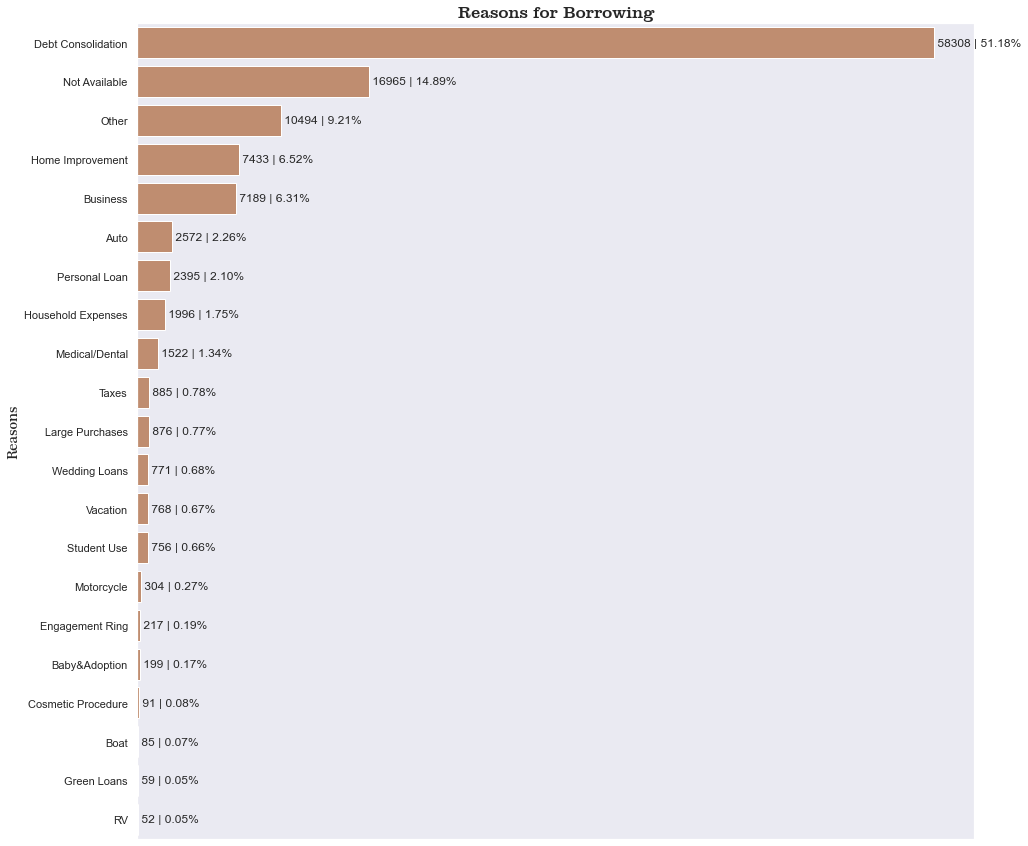

In [21]:
#set the figure size
plt.figure(figsize=[15,15])

#count plot for reasons for borrowing
Countplty(loan_clean['ListingCategory'], "Reasons for Borrowing", '', "Reasons")

The most reasons that individuals were taking loans was Debt consolidation. This means more than half of the individuals taking loans were taking them to pay back other loans that they had previously. Interestingly, the amount of people taking loans to make business purchase was minimal around 6%

### What are the income range of individuals taking loans?
To answer this, I plotted a count graph for individuals in their income range. 

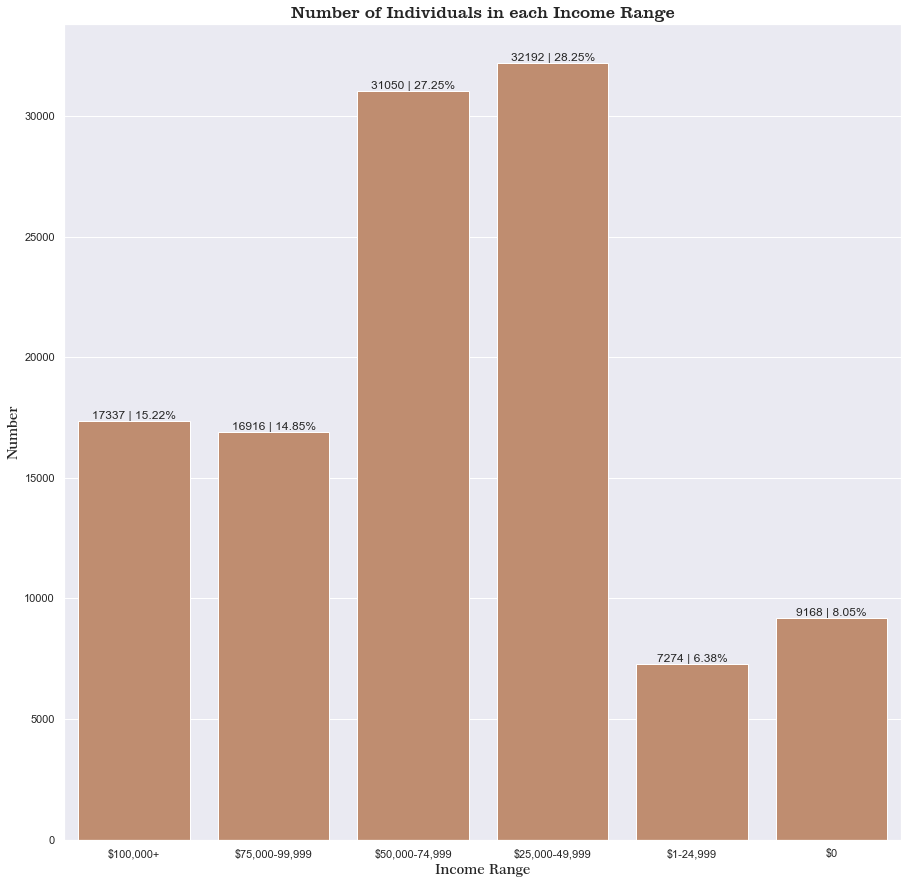

In [22]:
#count plot for individuals in each income range
Countpltx(loan_clean['IncomeRange'], 'Number of Individuals in each Income Range', 'Income Range', 'Number')

Most loans were taken by individuals within the \\$25,000-49,99 and \\$50,000-74,999 income range. This implies that most individuals that take loans are from mid-range income class. Income class below \\$24,999 generally have lower numbers of individuals with loans. This could mean that individuals in lower income class are not given loans or don't take loans.

### Which ratings have the highest number of individuals?
Prosper gives its users ratings from AA which is very good to HR which is high risk. To answer the question, I created a count plot af all the ratings.

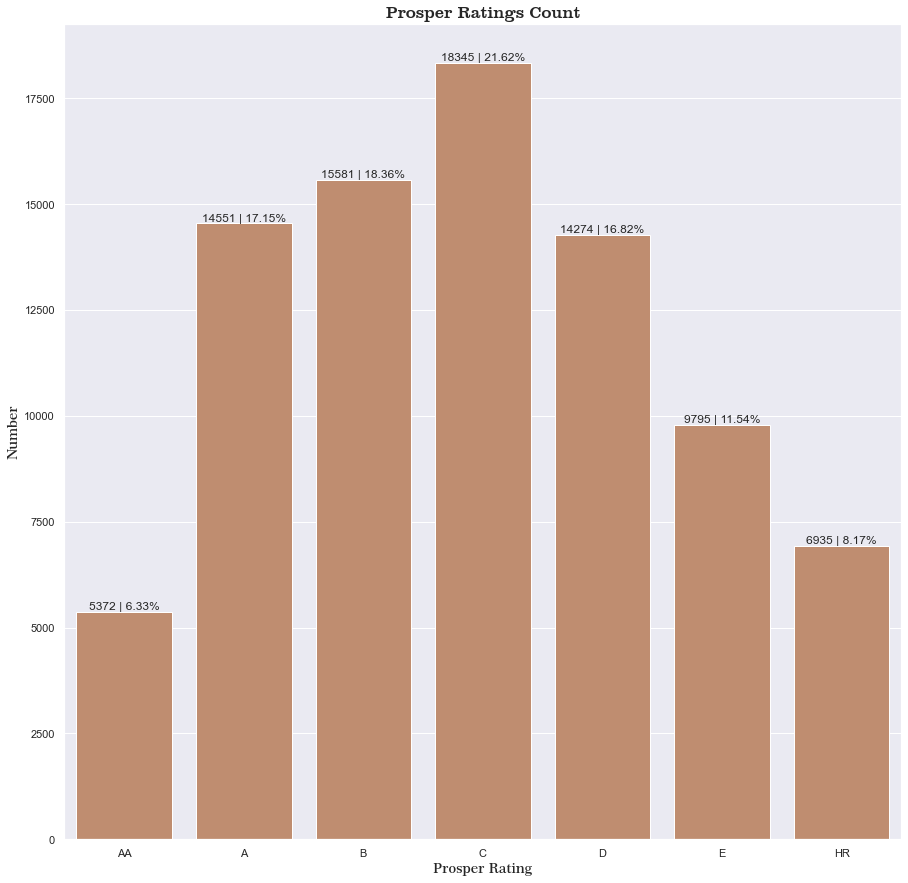

In [23]:
#count plot for prosper ratings
Countpltx(loan_clean['ProsperRating'], 'Prosper Ratings Count', 'Prosper Rating', 'Number')

'C' rating which is average has the highest number of loans. Individuals with high risk ratings exceeds individuals with AA rating. However the majority of individuals fall between the AA rating and C rating.

### What is the current state of loans taken on prosper?
Loans can either be completed, cancelled, current, or past due. To answer this question, I plotted a count graph of loan status 

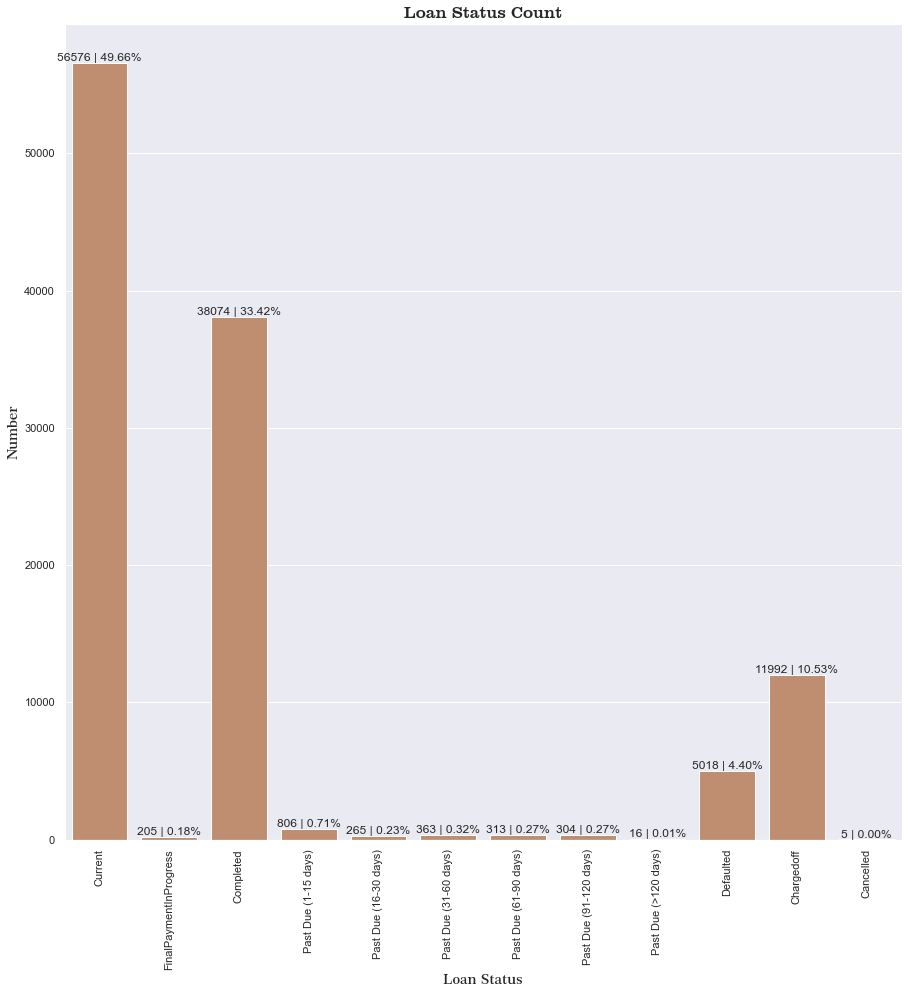

In [24]:
#count plot for loan status
Countpltx(loan_clean['LoanStatus'], 'Loan Status Count', 'Loan Status', 'Number')
plt.xticks(rotation = 90);

A majority of loans are still current while a lot are completed, defaulted or charged off. Minority of loans are either past due, cancelled or have final payment in progress. Only 5 loans are cancelled and only 16 loans are past due between 91 and 120 days.

### What is the average duration of a loan?
Prosper investors give loans within 3 distinct time frame. 1 year, 3 years and 5 years. To find out which loan term has the highest number of loans, I plotted a count graph with the loan term 

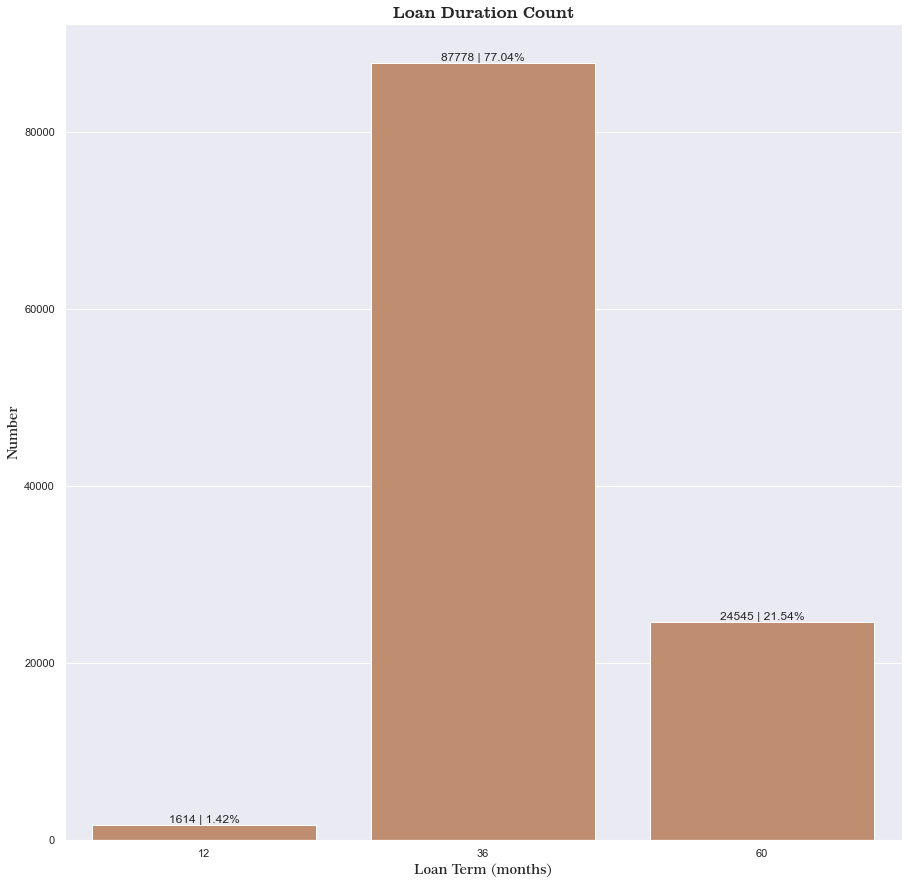

In [25]:
#count plot for loan duration
Countpltx(loan_clean['Term'], 'Loan Duration Count', 'Loan Term (months)', 'Number')

It was discovered that most loans have a 36 month or 3 years duration. Only a few loans have a one year and more have a five year duration  

### How many prosper loans do individuals take on average?
Individuals sometimes have more than one loan that they acquired from prosper. To find the number of loans taken by individuals, I plotted a count graph with the number of loans individuals have taken.

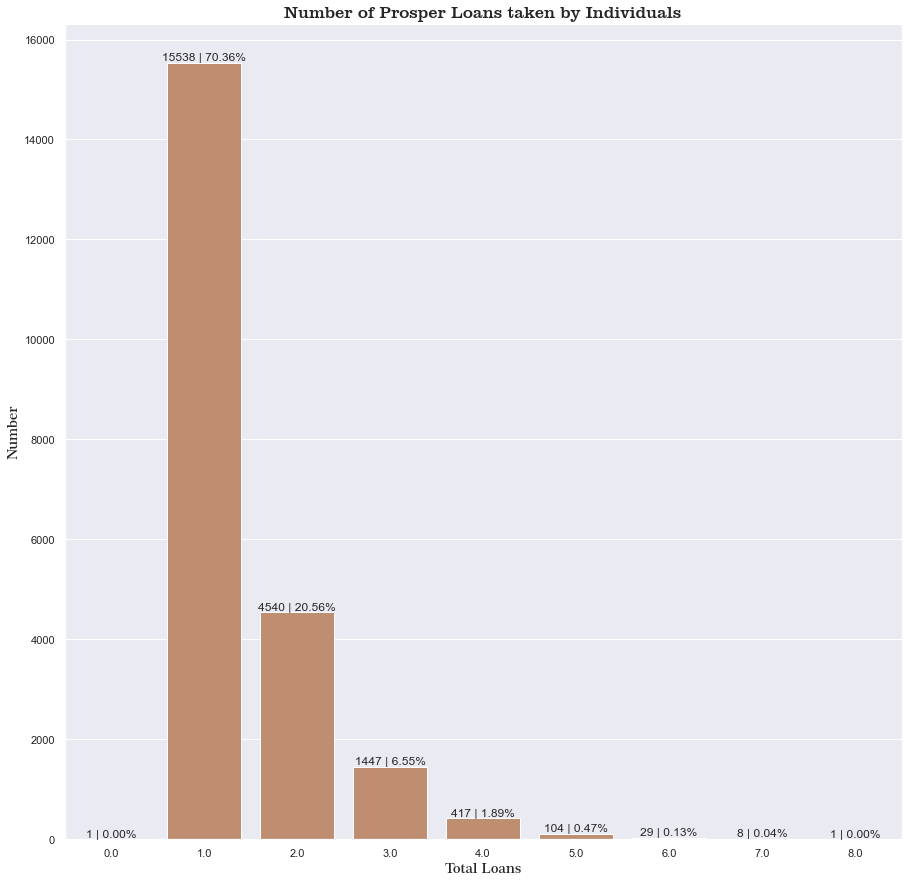

In [26]:
#count plot for loans taken by individuals
Countpltx(loan_clean['TotalProsperLoans'], 'Number of Prosper Loans taken by Individuals', 'Total Loans', 'Number')

Majority of individuals have taken only one loan, while a significant number of individuals have taken two to four loans.  

### What is the distribution of debt to income ratio of individuals?
For easier visualization, I converted tha y-axis to a log scale

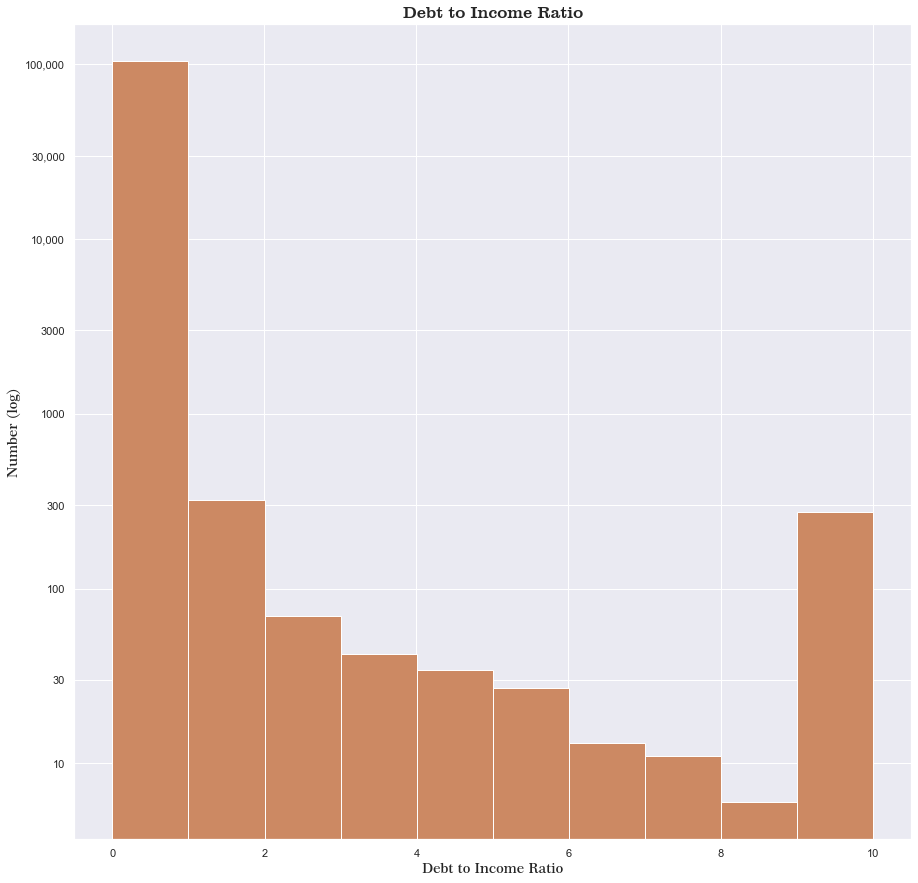

In [27]:
#histogram for debt to income ratio
plt.hist(data = loan_clean,  x='DebtToIncomeRatio', color = plt_color)

#replace the vertical labels
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['10', '30', '100', '300', '1000', '3000', '10,000', '30,000', '100,000']
plt.yscale('log')
plt.yticks(ticks, labels)

#display graph labels
plt.title('Debt to Income Ratio', fontdict = title_font)
plt.xlabel('Debt to Income Ratio', fontdict = label_font)
plt.ylabel('Number (log)', fontdict = label_font);


The histogram is right skewed which means more individuals have less debt to income ratio with the exception of 10 which is an outlier with about 300 individual loans

In [28]:
#creating a function to plot histograms in pairs
def Histplt(plt_no, x, title, xlabel, ylabel, lln, bn):
    '''This function plots histograms in pairs of 2'''
    #define subplots
    ax = plt.subplot(1,2,plt_no)
    
    #defining bins
    bins = np.arange(lln, loan_clean[x].max()+bn, bn)
    
    #plot the histogram
    plt.hist(loan_clean[x], bins = bins, color=plt_color)

    #display graph labels
    plt.title(title, fontdict=title_font)
    plt.xlabel(xlabel, fontdict=label_font)
    plt.ylabel(ylabel, fontdict=label_font);

### What is the distribution of monthly loan payment and borrower's interest rate
A distribution can easily be seen using a Histogram. I plotted a histogram to see the distribution of monthly loan payment and borrower's interest rate

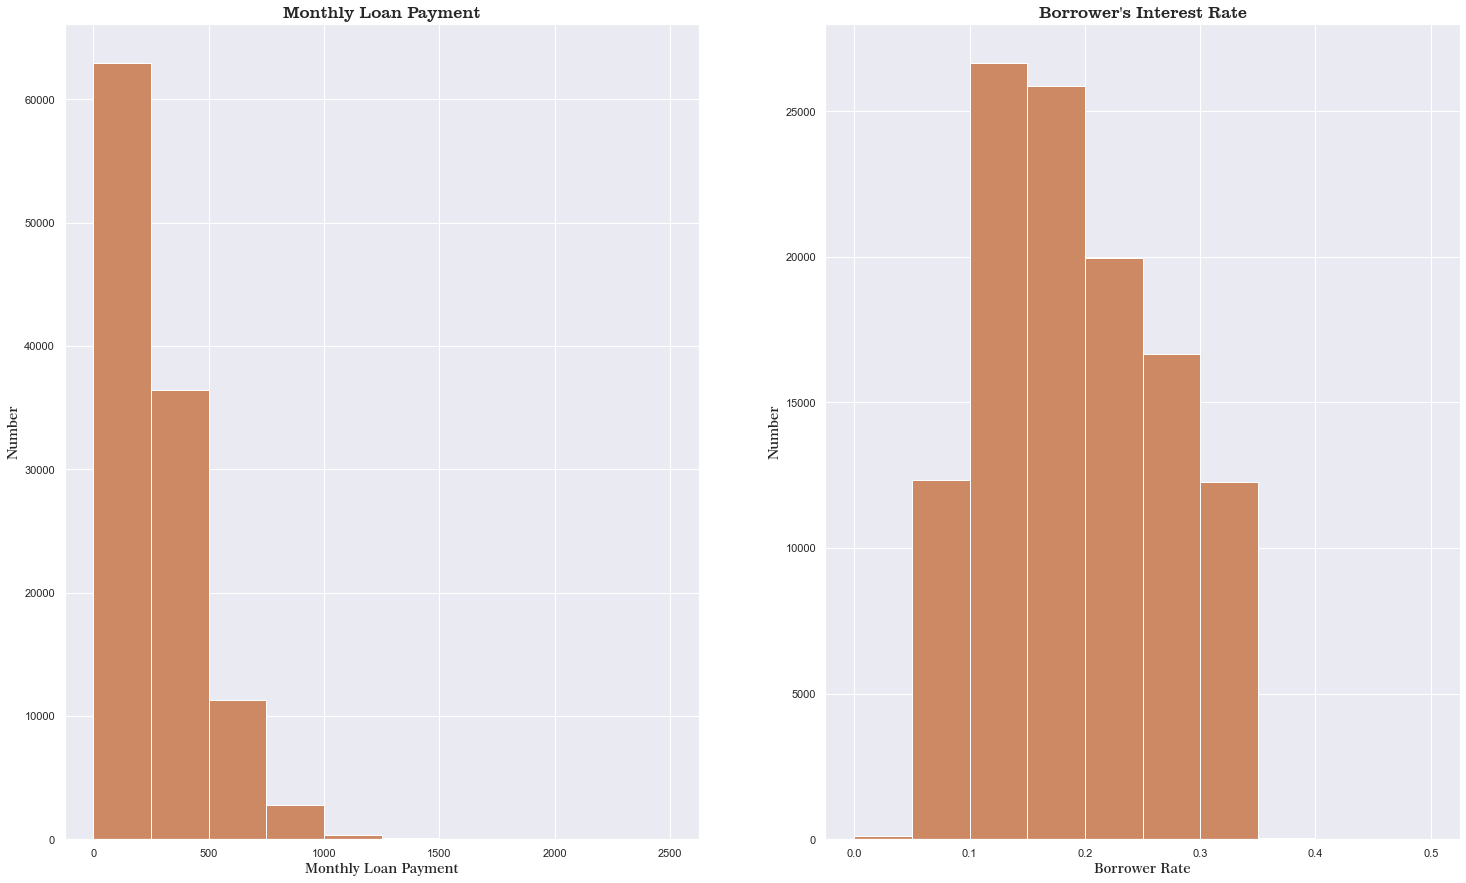

In [29]:
#set figure size
plt.figure(figsize=[25,15])

#histogram for monthly loan payment and borrower's interest rate
Histplt(1, 'MonthlyLoanPayment', 'Monthly Loan Payment', 'Monthly Loan Payment', 'Number', 0, 250)
Histplt(2, 'BorrowerRate', 'Borrower\'s Interest Rate', 'Borrower Rate', 'Number', 0, 0.05)

A majority of monthly loan payment is between \\$0 and \\$250. The other individuals pay between \\$250 and \\$1000 with just a few paying above that.
Typically the borrower's interest ranges between 0.1 and 0.35. It peaks between 0.1 and 0.15. 

### What is the distribution of number of investors and loan amount
Prosper loans are unique in the sense that it is other individuals that invest to give loan to the individuals. Most loans have more than one investors and can have up to one thousand investors. I plotted a histogram to see the distribution of the number of investors and the loan amount.

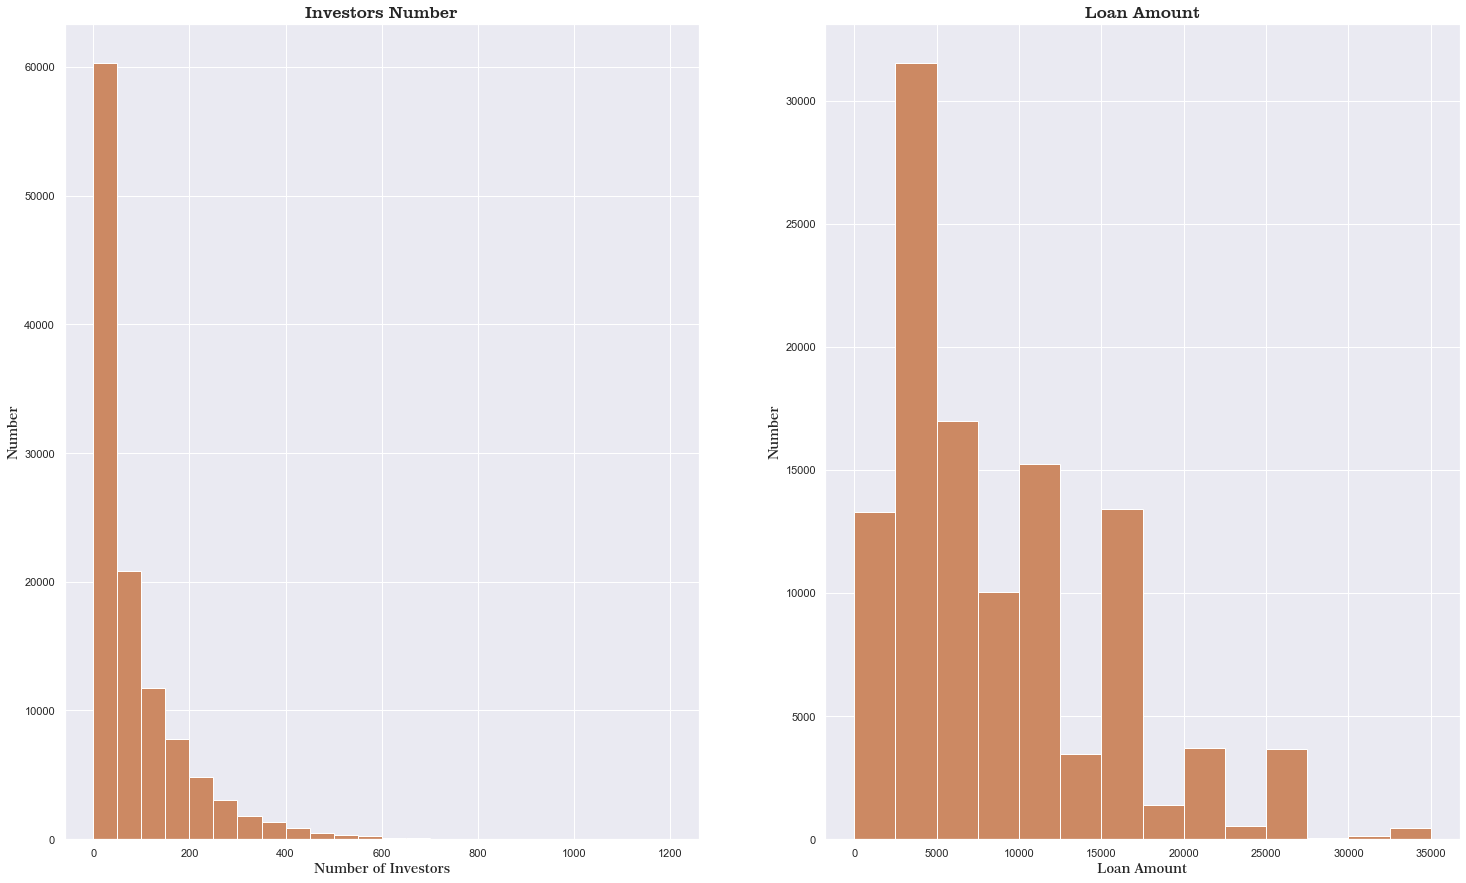

In [30]:
#set the figure size
plt.figure(figsize=[25,15])

#histogram for investor's and loan amount
Histplt(1, 'Investors', 'Investors Number', 'Number of Investors', 'Number', 0, 50)
Histplt(2, 'LoanOriginalAmount', 'Loan Amount', 'Loan Amount', 'Number', 0, 2500)

Most loans had between 0 and 50 investors. Other loans had between 150 and 600 investors while there were loans that had more than 1000 investors.
The loan amount varies but most loans were between \\$2500 and \\$5000 with loans between \\$5000 and \\$7500 being in the next order.

### Is there any variation between the lower credit score and upper credit score?
In order to understand the relationship between lower credit score and upper credit score, I plotted a histogram for the both variables.

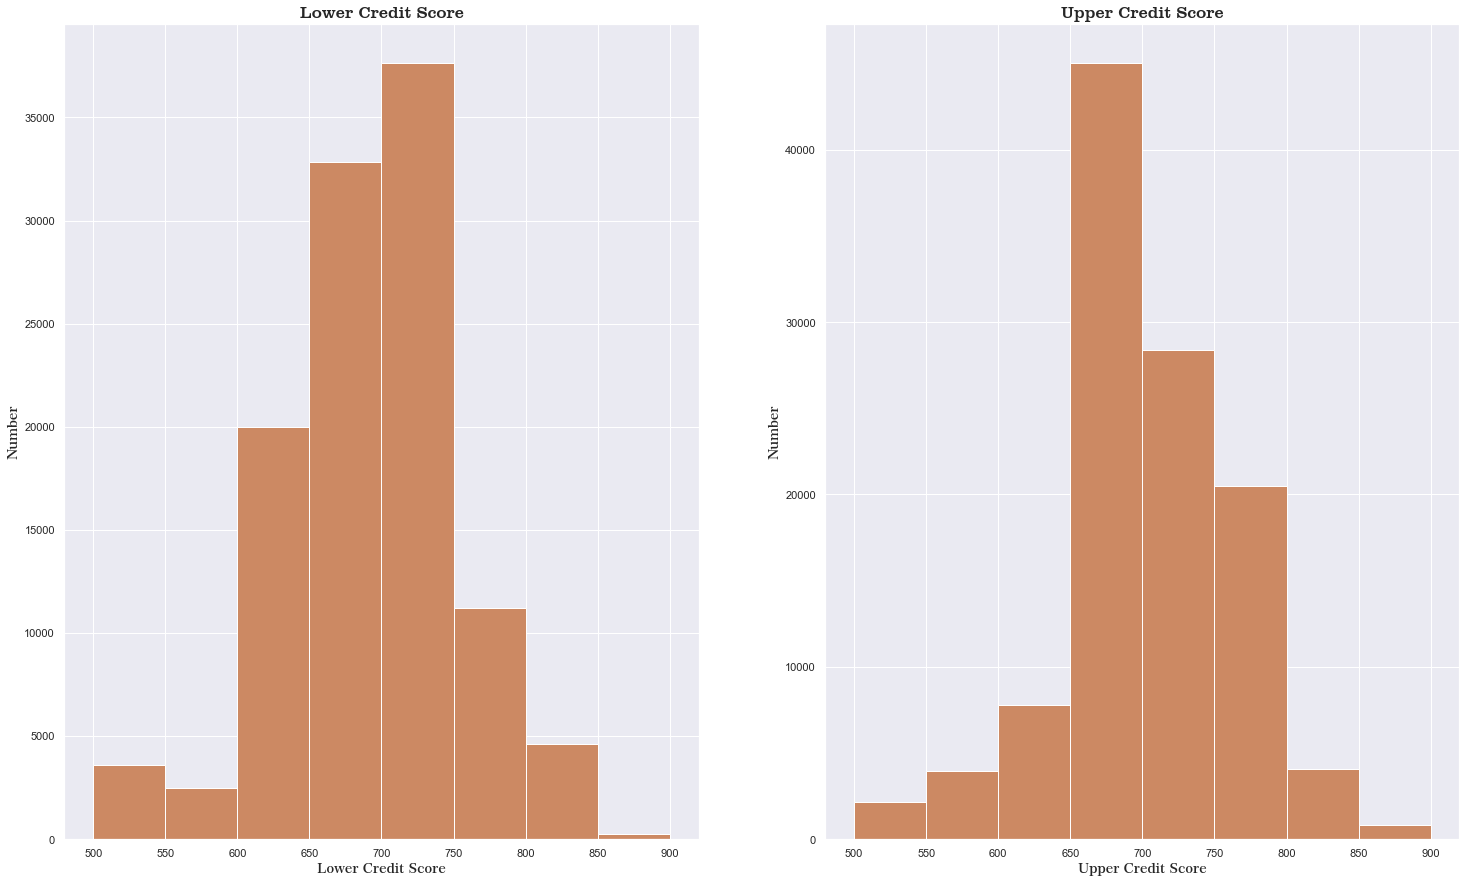

In [31]:
#set the figure size
plt.figure(figsize=[25,15])

#histogram for lower and upper credit score
Histplt(1, 'CreditScoreRangeLower', 'Lower Credit Score', 'Lower Credit Score', 'Number', 500, 50)
Histplt(2, 'CreditScoreRangeUpper', 'Upper Credit Score', 'Upper Credit Score', 'Number', 500, 50)

As opposed to my expectations, there is a slight difference between the lower credit score and the upper credit score. Surprisingly, upper credit score tends to have lower values than lower credit score.

---

<a id="#bivariate"></a>
## Bivariate Exploration
> In this section,  I investigated the distributions of grouped variables. The grouped variables I investigated are 
> - Loan Original Amount and Borrower\'s Interest Rate
> - Monthly Income and Number of Investors
> - Borrower's rate and monthly income
> - Income Range and Borrower's Interest Rate
> - Employment Status and Borrower's Interest Rate
> - Income Range and Debt-to-Income Ratio
> - Income Range and Loan Original Amount
> - Income Range and Total Prosper Loans
> - Income Range and Prosper rating
> - Number of each Prosper Rating for each Income Range

### What is the relationship between the borrower's interest rate and the loan original amount?
Could there be a correlation between the  borrower's interest rate and the loan original amount. If so, is it a positive or negative one

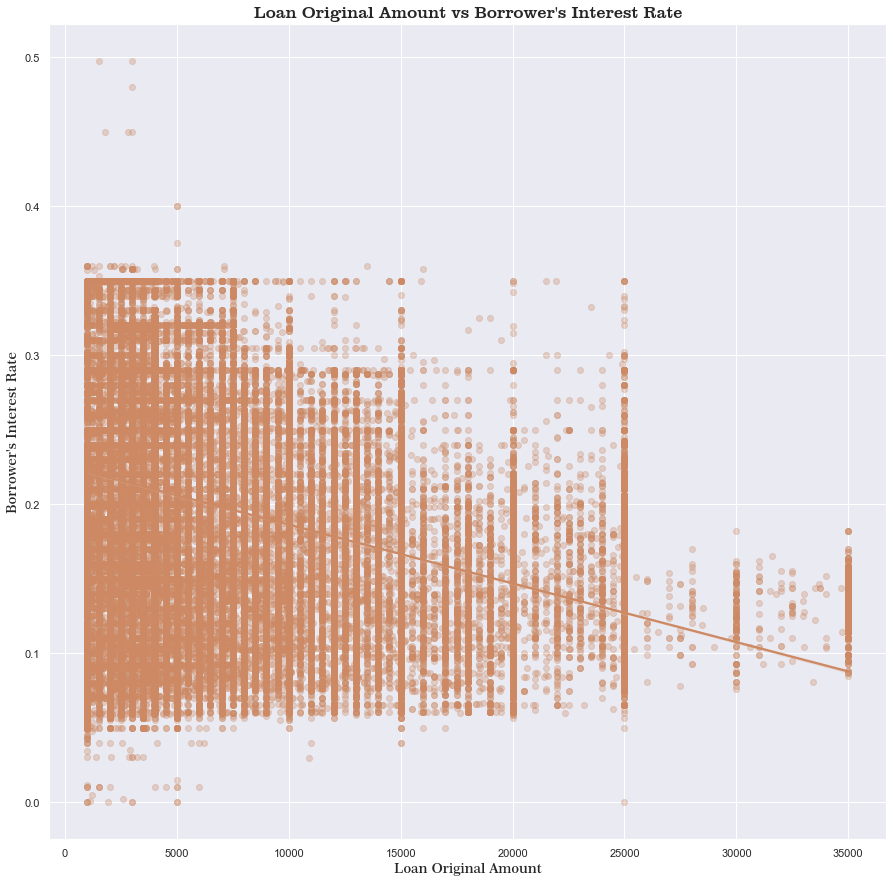

In [32]:
#relationship between borrower's interest rate and loan original amount
sns.regplot(data = loan_clean, x='LoanOriginalAmount', y='BorrowerRate', scatter_kws={'alpha':0.3}, x_jitter=0.3, color=plt_color)

#display graph labels
plt.title('Loan Original Amount vs Borrower\'s Interest Rate', fontdict=title_font)
plt.xlabel('Loan Original Amount', fontdict=label_font)
plt.ylabel('Borrower\'s Interest Rate', fontdict=label_font);

From the fit regression line, there seems to be a slightly negative correlation between the loan original amount and the borrower's interest rate. This would suggest that higher loan amount have lower interest rate. This would be investigated further in the upcoming exploration.

In [33]:
#maximum value of the monthly income
loan_clean['StatedMonthlyIncome'].max()

1750002.916667

The average income of those in the US is \\$44,000 which is ~\\$3700 monthly. While a monthly income of 1,750,002 is possible, It is far above the average and is an outlier. This would have effect on any results that would include using Income. I would subset the data to remove all monthly income that is above \\$15,000.

In [34]:
#replace all value above $15000 with the median of the data to avoid outliers
loan_clean['StatedMonthlyIncome'].values[loan_clean['StatedMonthlyIncome'] > 15000] = loan_clean['StatedMonthlyIncome'].median()

In [63]:
#creating a function to plot a scatter graph
def Regplt(x, y, title, xlabel, ylabel):
    '''This function plots a scatter graph'''
    #regression plot
    sns.regplot(data = loan_clean, x=x, y=y, x_jitter=0.3, scatter_kws={'alpha':0.3}, color=plt_color)
    
    #display graph labels
    plt.title(title, fontdict=title_font)
    plt.xlabel(xlabel, fontdict=label_font)
    plt.ylabel(ylabel, fontdict=label_font)

### Do individuals with higher income have more investors?
There might be a relationship between the number of investors and monthly income

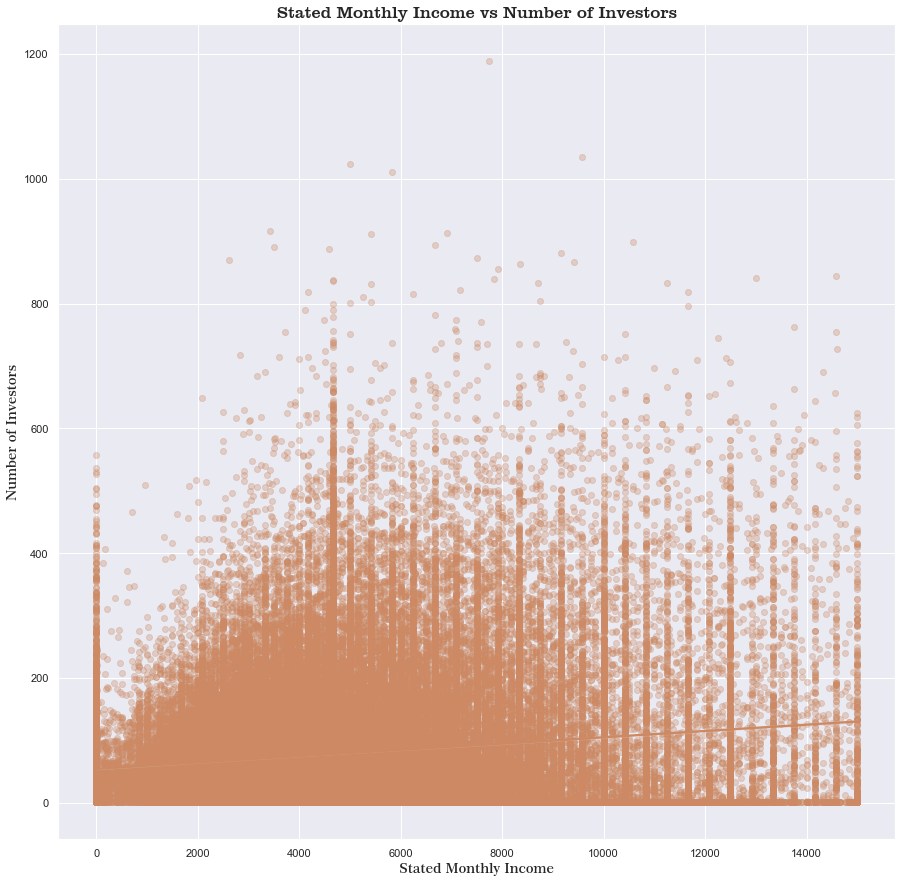

In [64]:
#relationship between monthly income and number of investors
Regplt('StatedMonthlyIncome', 'Investors', 'Stated Monthly Income vs Number of Investors', 'Stated Monthly Income', 'Number of Investors')

Apparently, there is no significant relationship between monthly income and number of investors. This means you're still likely to get investors even though your income is low

### Do individuals borrowing a higher amount of money have more investors?
Prosper doesn't give loans directly. Instead, the loans are backed by investors. It is important to know if there are more investors with a higher loan amount

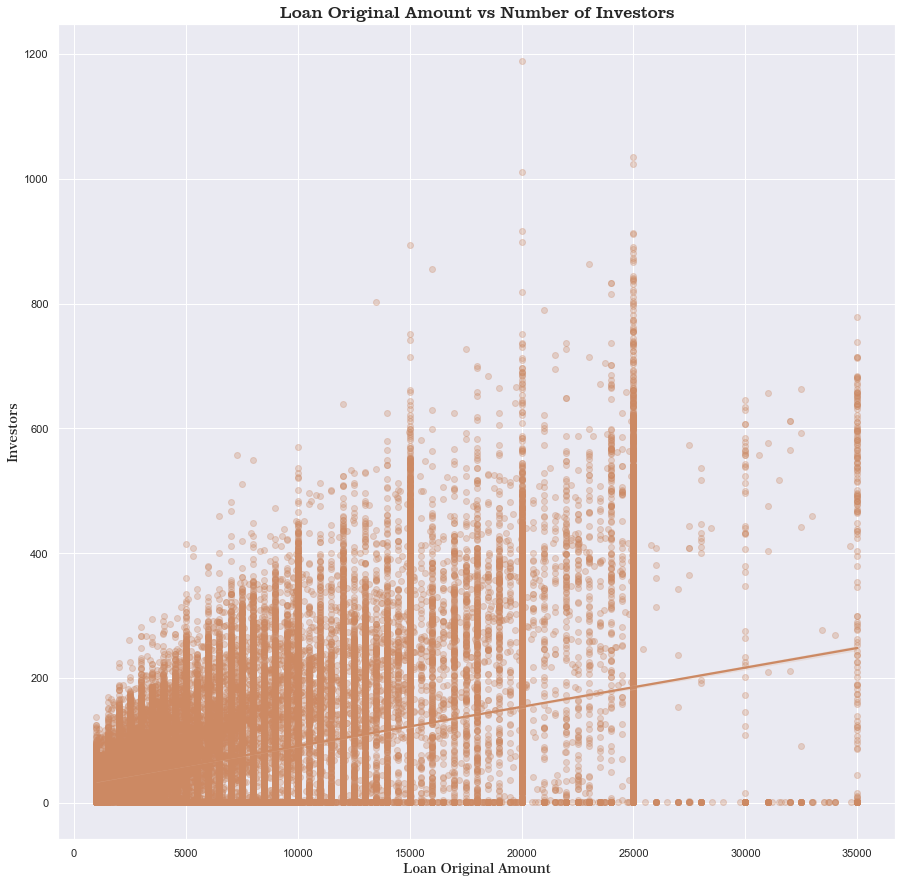

In [65]:
#relationship between loan original amount and number of investors
Regplt('LoanOriginalAmount', 'Investors', 'Loan Original Amount vs Number of Investors', 'Loan Original Amount', 'Investors')

There is a slight relationship between the loan original amount and the number of investors. More loan amount would need more investors with the highest number of investors being around the loan amount of 20,000 and 25,000  

### How does Monthly Income affect the Borrower's rate?
Can the income of an individual affect their interest rate, if so, how does it affect it.

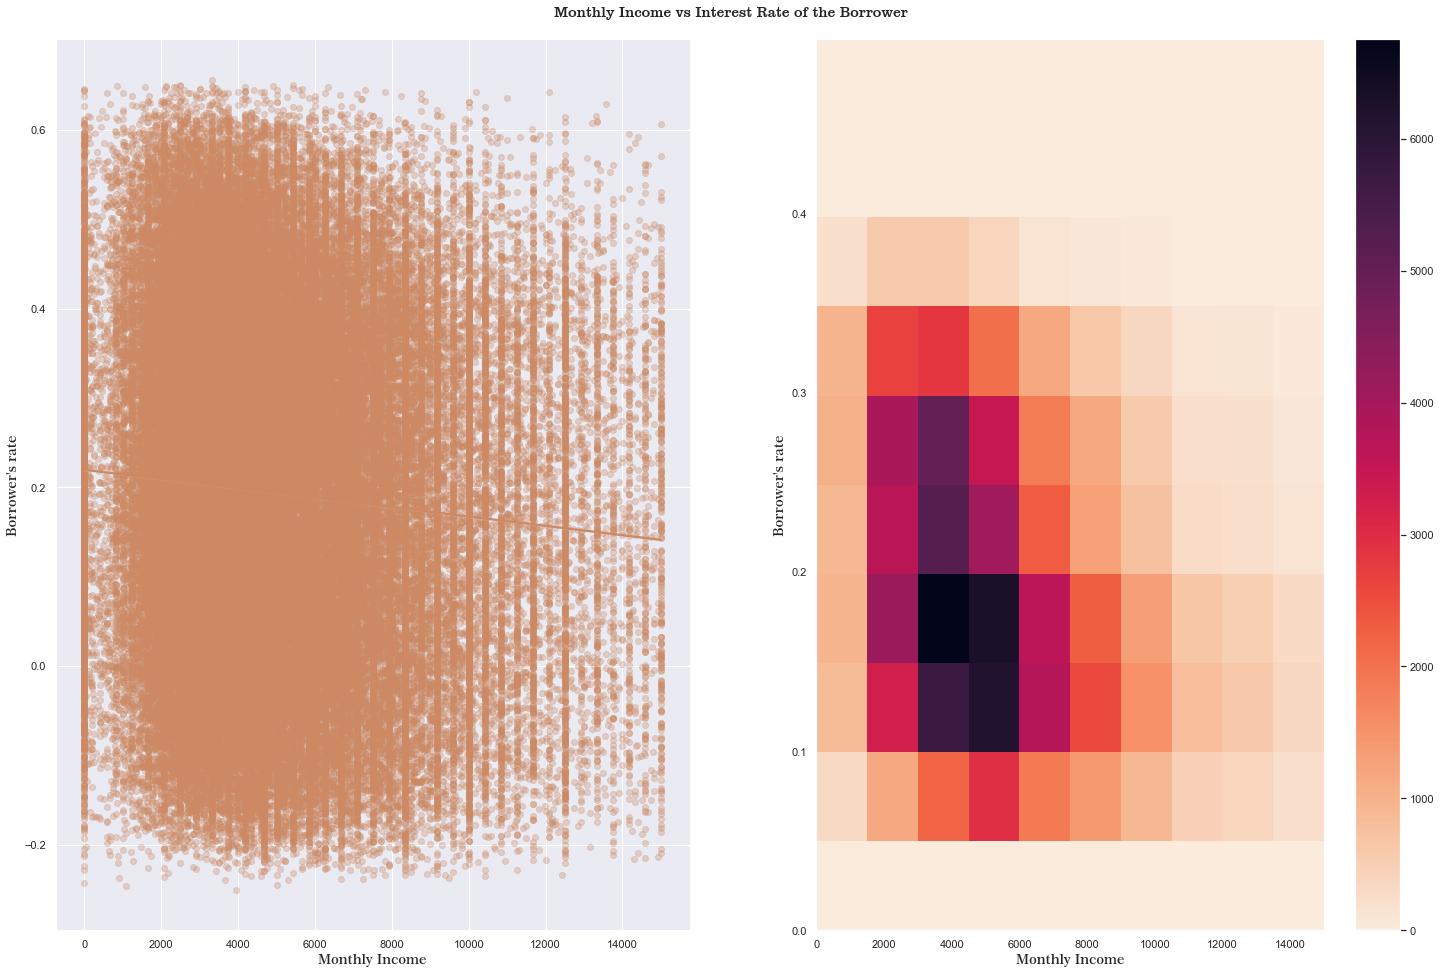

In [36]:
#set the figure size
plt.figure(figsize=[25,15])

#subplot 1 - scatter plot of monthly income vs borrower's interest rate
plt.subplot(1,2,1)
sns.regplot(data=loan_clean, x='StatedMonthlyIncome', y='BorrowerRate', scatter_kws={'alpha':0.3}, x_jitter=0.2, y_jitter=0.3, color=plt_color);

#display graph labels
plt.ylabel('Borrower\'s rate',  fontdict=label_font)
plt.xlabel('Monthly Income',  fontdict=label_font)

#subplot 2 - heatmap of monthly income vs borrower's interest rate
plt.subplot(1,2,2)
plt.hist2d(data=loan_clean, x='StatedMonthlyIncome', y='BorrowerRate', cmap='rocket_r',)
plt.colorbar()

#display graph labels
plt.ylabel('Borrower\'s rate',  fontdict=label_font)
plt.xlabel('Monthly Income',  fontdict=label_font)

plt.suptitle('Monthly Income vs Interest Rate of the Borrower', fontdict=title_font)
plt.subplots_adjust(top=0.95);

There seem to be no significant relationship between the borrower's rate and monthly income. However, the heatmap reveals a lot of concentration of points where Monthly Income is approximately 4000 and Interest Rate is is around 0.15 - 0.2 % 

In [37]:
#creating a function to plot both violin and boxplot
def BV_plot(pltnr, types, x, y, title, xlabel, ylabel):
    '''This function plots a violin or box plot in pairs'''
    
    #subplot
    plt.subplot(1, 2, pltnr)

    #input the type of graph and other parameters
    types(data = loan_clean, x=x, y=y, color=plt_color)
    
    #display graph labels
    plt.xticks(rotation = 90)
    plt.title(title, fontdict=title_font)
    plt.xlabel(xlabel, fontdict=label_font)
    plt.ylabel(ylabel, fontdict=label_font)

### Does the income range and employment status of an individual have an effect on the interest rate they would be given?
It is expected that people with higher income range would have access to less interest rate and those employed would also have less interesst rate. 

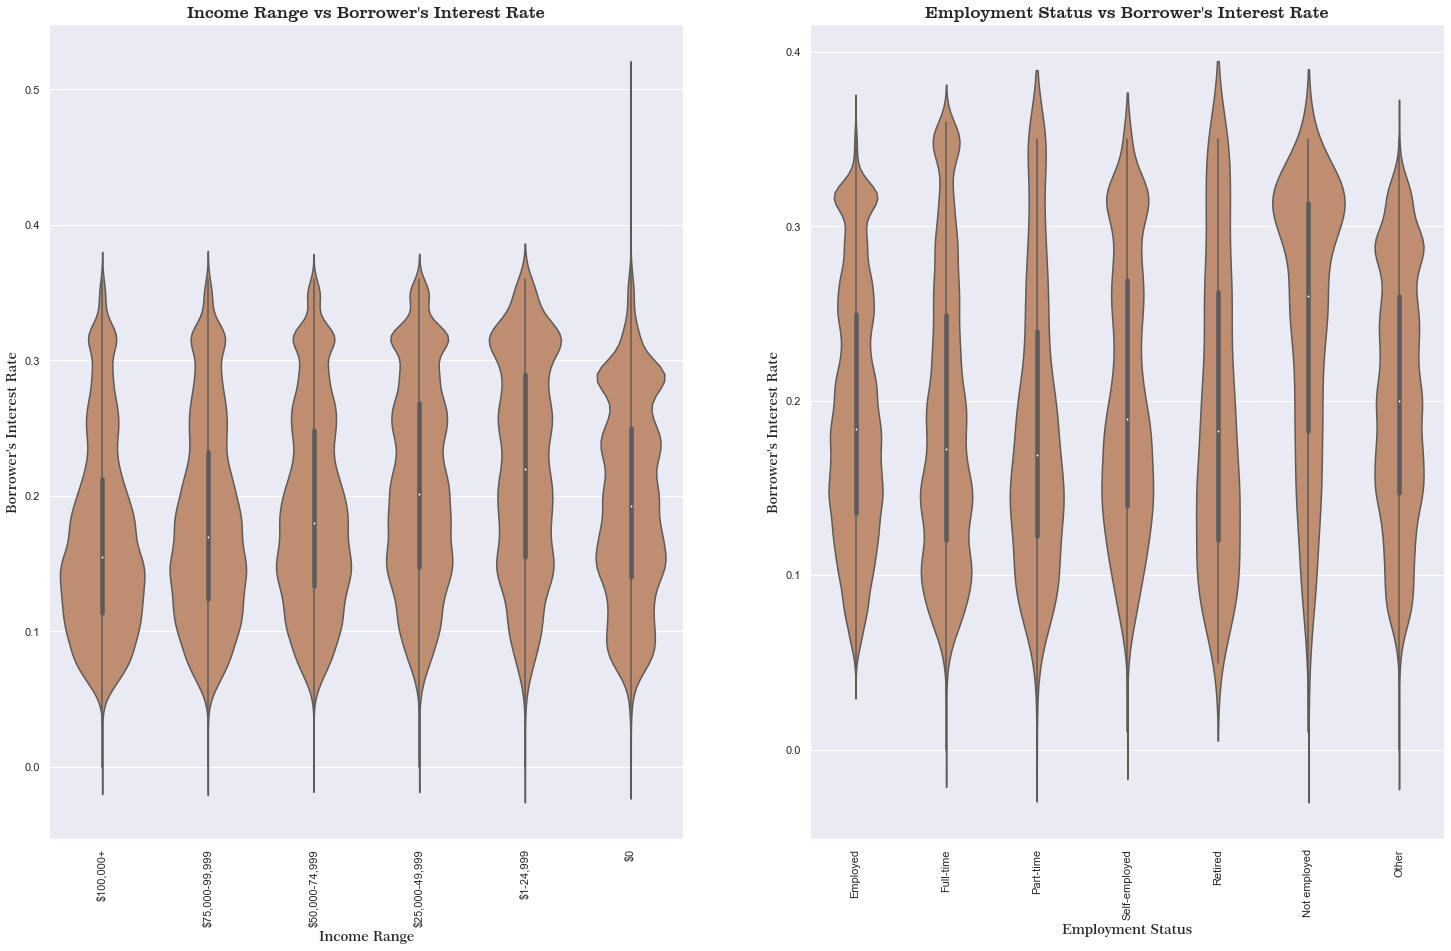

In [38]:
#setting the figure size
plt.figure(figsize=[25,15])

#relationship between income range and borrower's interest rate
BV_plot(1, sns.violinplot, 'IncomeRange', 'BorrowerRate', 'Income Range vs Borrower\'s Interest Rate', 'Income Range', 'Borrower\'s Interest Rate')

#relationship between employment status and borrower's interest rate
BV_plot(2, sns.violinplot, 'EmploymentStatus', 'BorrowerRate', 'Employment Status vs Borrower\'s Interest Rate', 'Employment Status', 'Borrower\'s Interest Rate')

On the violin plot of the income range and borrower's interest rate, the higher the income range, the lower the borrower's interest rate and the range with the highest borrower's interest rate is the \\$1-24,999 range.
Interest rate seems to be the highest in the not employed status although there less interest rate in the part-time and retired group than in the other groups. Further investigation would be done in the multivariate exploration section

### Does the income range of an individual have an effect on their debt to income ratio and the amount of loan they can get?
I'd like to further explore the debt to income ratio and original loan amount by pairing it with income range to check for any significant insights

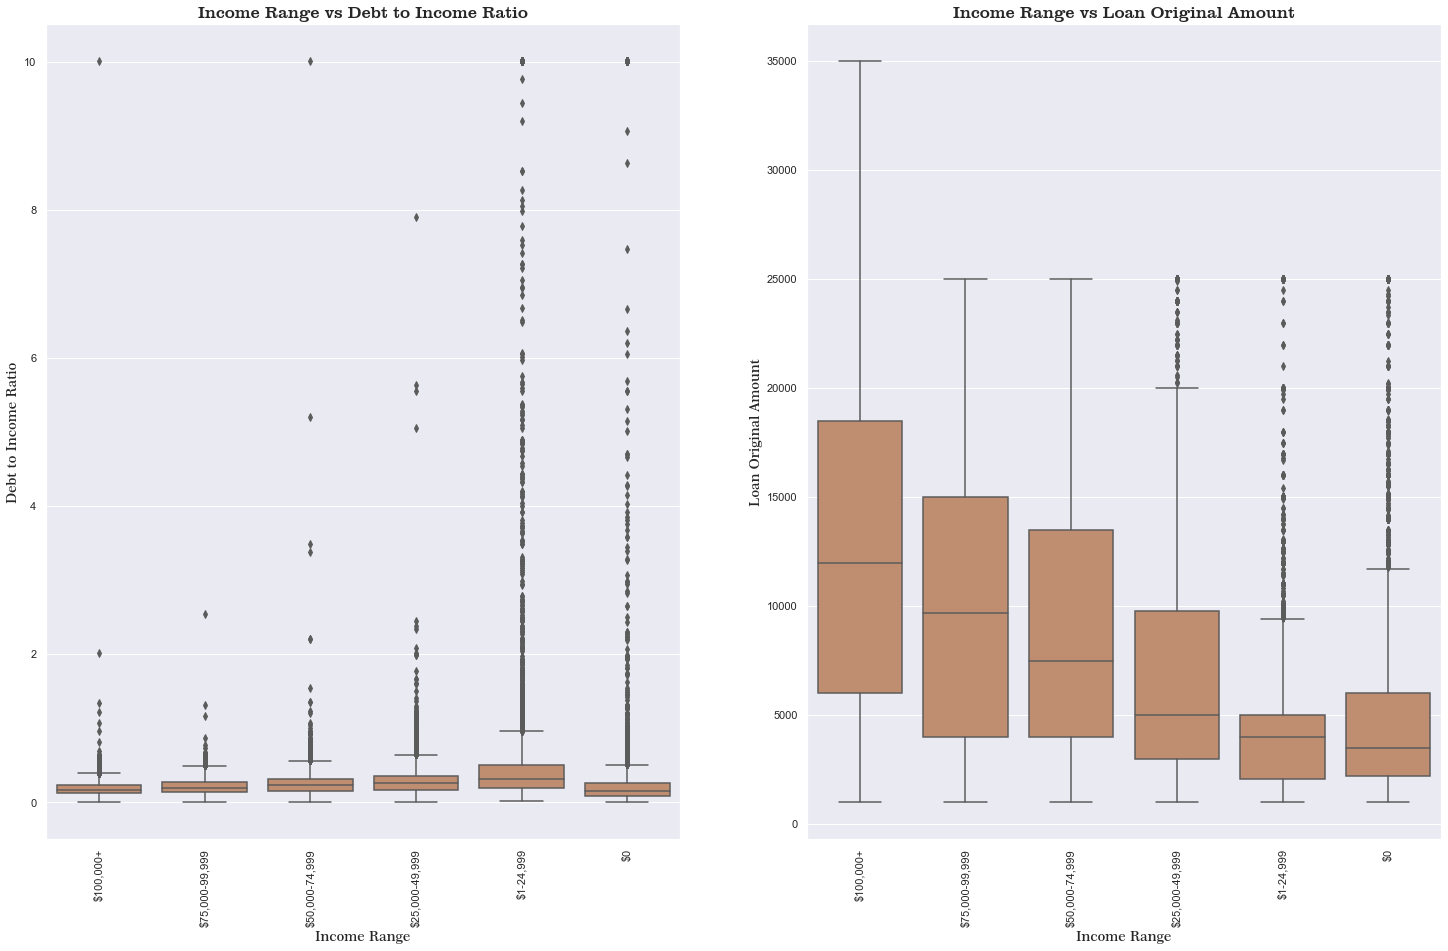

In [39]:
#setting the figure size
plt.figure(figsize=[25,15])

#relationship between income range and debt to income ratio
BV_plot(1, sns.boxplot, 'IncomeRange', 'DebtToIncomeRatio', 'Income Range vs Debt to Income Ratio', 'Income Range', 'Debt to Income Ratio')

#relationship between income range and loan original amount
BV_plot(2, sns.boxplot, 'IncomeRange', 'LoanOriginalAmount', 'Income Range vs Loan Original Amount', 'Income Range', 'Loan Original Amount')

In the relationship between the Income Range and the Debt to Income ratio, as expected, lower income ranges tend to have more debt to income ratio. Individuals with more than \\$100,000 in income have the lowest debt to income ratio. However, the median of all income ranges seem to be around the same area with only a little increase with reduction in income range.
In the relationship between 
Higher income ranges tend to get higher loan amount with the median of those earning above \\$100,000 being more than \\$12,000. Those with income below \\$25,000 tend to get lower loans of below \\$5000

### Does the income range of an individual have an effect on the number of loans they owe and their ratings given by Prosper?
I'd like to further explore prosper loans and prosper ratings by pairing them with income range

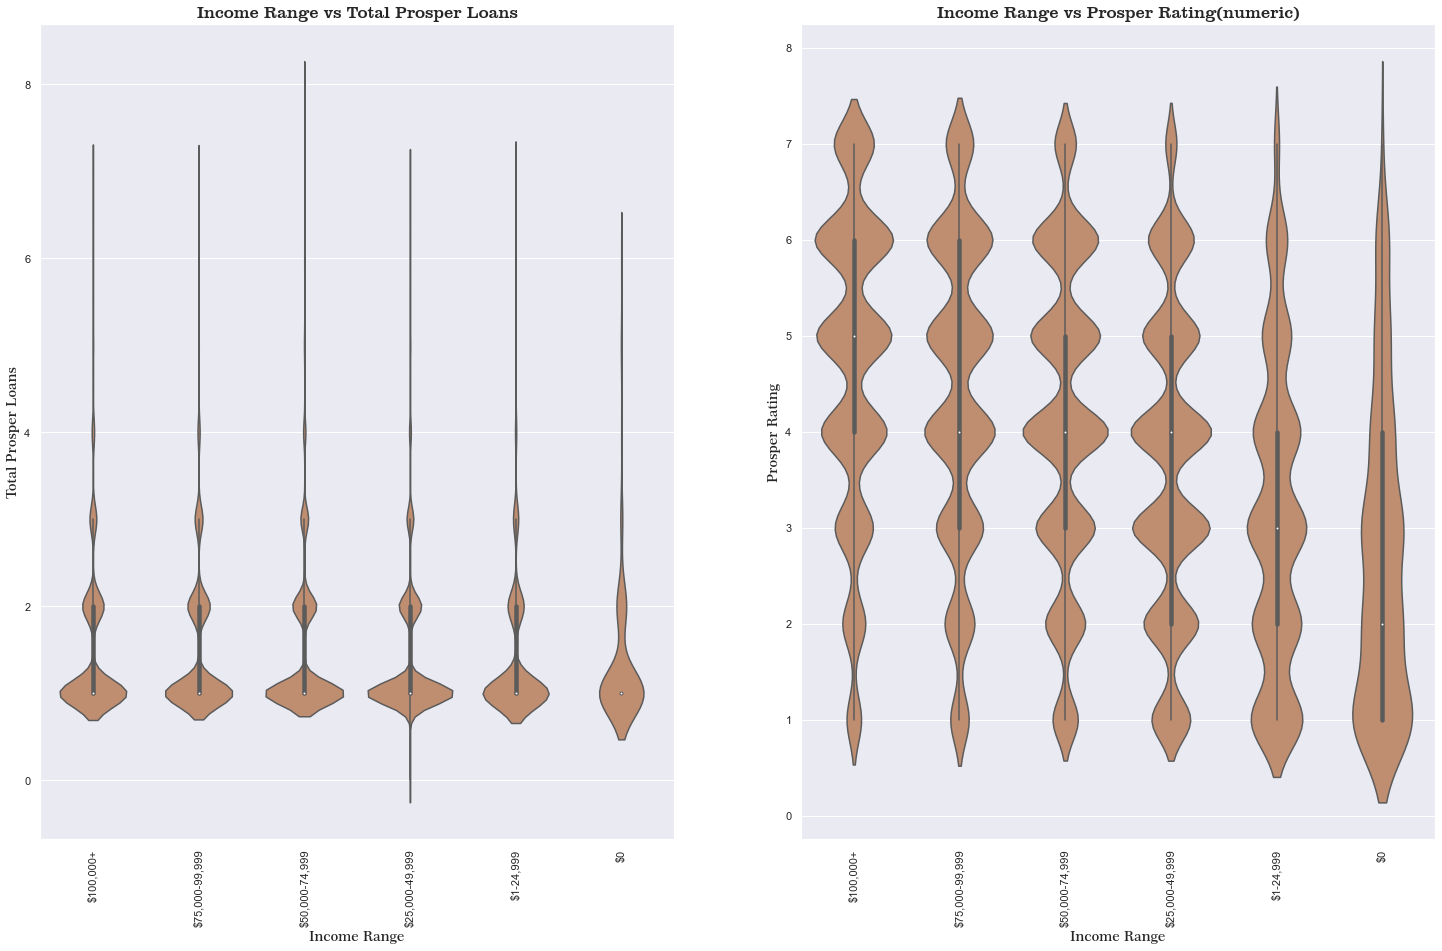

In [40]:
#setting the figure size
plt.figure(figsize=[25,15])

#relationship between income range and total prosper loans
BV_plot(1, sns.violinplot, 'IncomeRange', 'TotalProsperLoans', 'Income Range vs Total Prosper Loans', 'Income Range', 'Total Prosper Loans')

#relationship between income range and prosper ratings
BV_plot(2, sns.violinplot, 'IncomeRange', 'ProsperRating (numeric)', 'Income Range vs Prosper Rating(numeric)', 'Income Range', 'Prosper Rating')

There seems to be no significant difference across income ranges of the number of loans they owe. There's however, a slight reduction in the number of people that owe more than 2 loans and earn \\$0.
On the other hand, individuals with higher income range tend to have a higher prosper rating. The ratings drop as the income range reduces. 

### What is the prosper rating spread of different income ranges?
It would be interesting to know the relationship between prosper rating and income range 

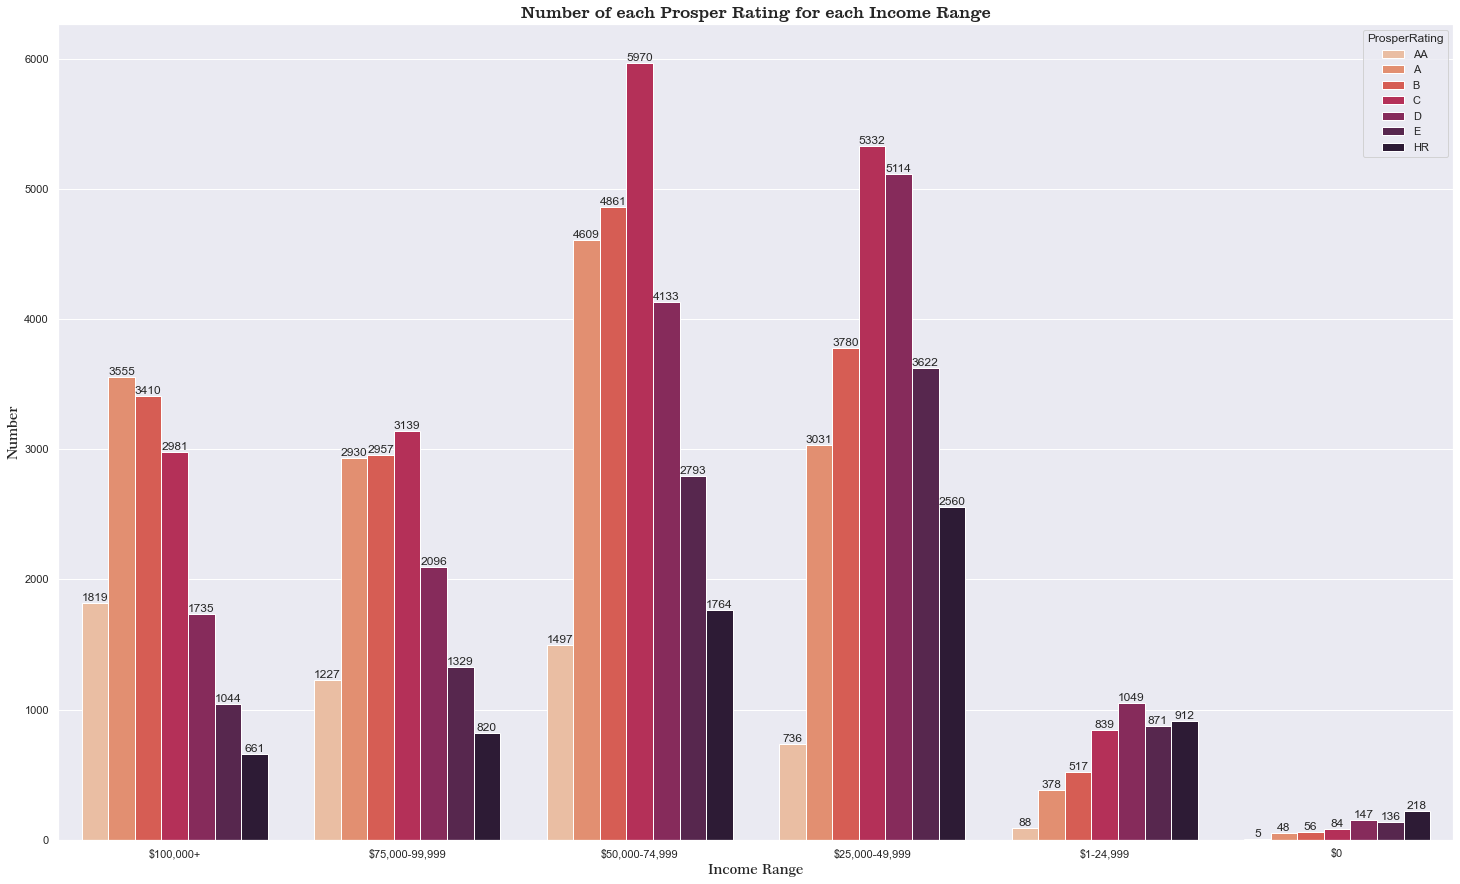

In [41]:
#setting the figure size
plt.figure(figsize=[25,15])

#plot the count graph with the hue argument
ax = sns.countplot(data=loan_clean, x='IncomeRange', hue='ProsperRating', palette='rocket_r')

#label each bar
for c in ax.containers:
    ax.bar_label(c)

#displat graph labels
plt.title('Number of each Prosper Rating for each Income Range', fontdict=title_font)
plt.xlabel('Income Range', fontdict=label_font)
plt.ylabel('Number', fontdict=label_font);

The group with the highest number of rating is the C-group in the \\$50,000-74,999 income range. The income range of \\$100,000+ had the highest AA rating and the income range of \\$25,000-49,999 had the highest HR rating. This could imply that the group with the highest risk is those within the \\$25,000-49,999 income bracket but this is also due to the fact that the most people fall between the \\$25,000-49,999 income bracket. Interestingly, those in the \\$0 and \\$1-24,999 have higher number of lower rating(D, E, HR) in comparison with the percentage of individuals that make up the groups.

---

<a id="#multivariate"></a>
## Multivariate Exploration
> In this section,  I investigated the distributions of grouped variables. The grouped variables I investigated are 
> - Borrower's Interest Rate, Year and Home Ownership
> - Borrower's Interest Rate, Income Range and Loan Term
> - Borrower's Interest Rate, Employment Status and Loan Term
> - Borrower's Interest Rate, Employment Status and Prosper Rating
> - Borrower's Interest Rate, Income Range and Prosper Rating
> - Monthly Loan Payment, Loan Amount and Income Range
> - Loan Original Amount, Borrower's Interest Rate and Prosper Rating
> - Loan Original Amount, Borrower's Interest Rate and Employment Status
> - Borrower's rate, Loan Original Amount, Monthly Loan Payment, Debt to Income Ratio, Prosper Rating and Stated Monthly Income

In [42]:
#creating a function to plot bargraphs
def Barplt(subplot, x, y, huecol, title, xlabel, ylabel):
    '''This function plots bar graphs alone or in pairs'''
    
    #plot the bar graph
    sns.barplot(data=loan_clean, x=x,  y=y, hue=huecol, palette='rocket_r')
    subplot

    #display graph labels
    plt.title(title, fontdict=title_font)
    plt.xlabel(xlabel, fontdict=label_font)
    plt.ylabel(ylabel, fontdict=label_font)

### How has Interest rate progress over the years for both home owners and non-home owners?
I'd want to further know if there is any form of discrimination between those that have homes and those that don't

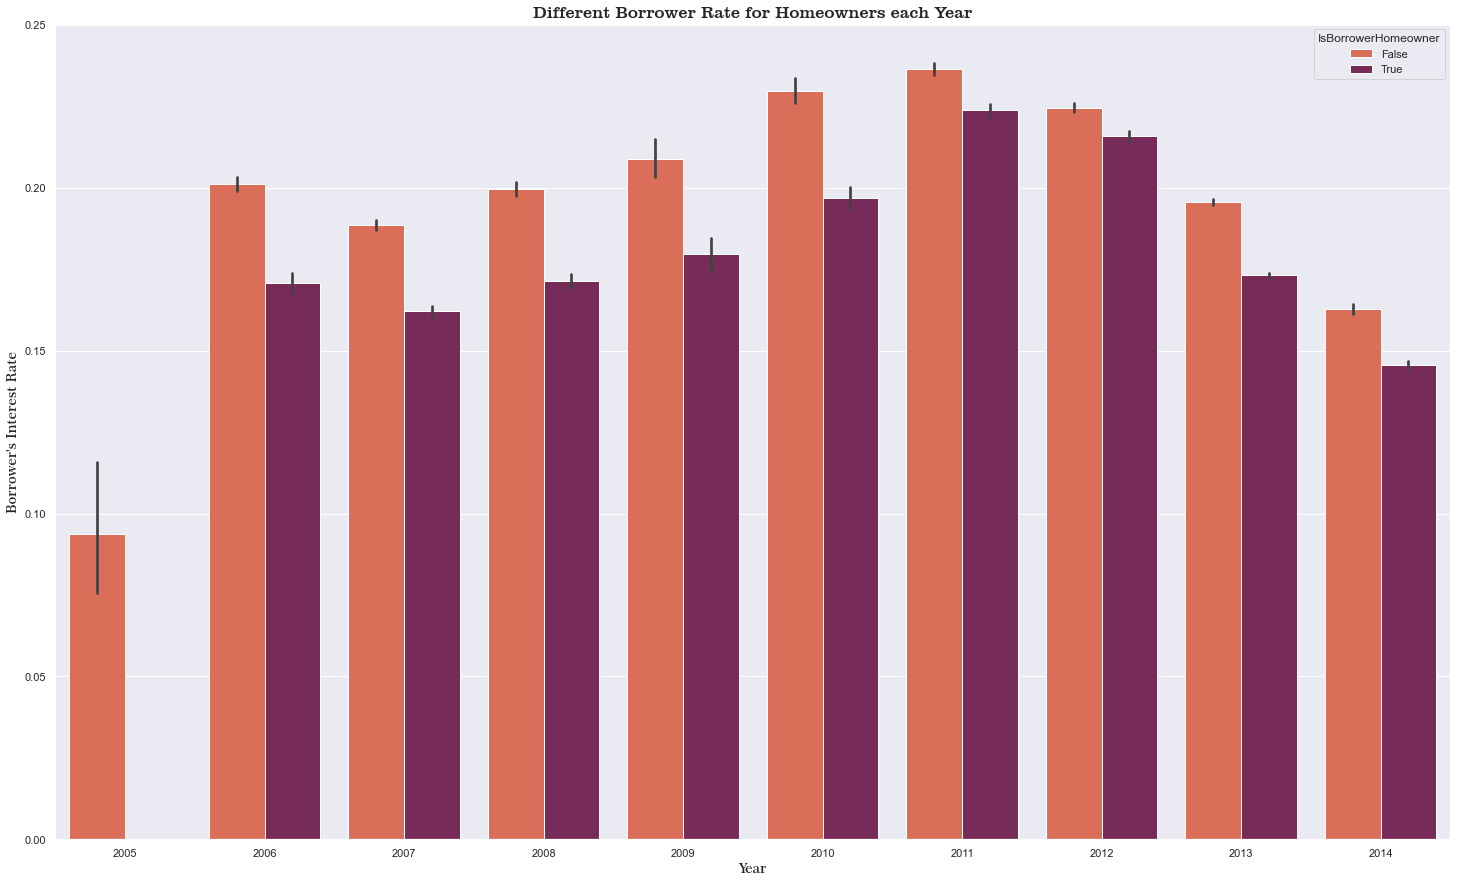

In [43]:
#setting the figure size
plt.figure(figsize=[25,15])

#relationship between year, borrower's interest rate, and being a home owner
Barplt(plt.subplot(1,1,1), loan_clean['LoanOriginationDate'].dt.year, 'BorrowerRate', 'IsBorrowerHomeowner', 'Different Borrower Rate for Homeowners each Year', 'Year', 'Borrower\'s Interest Rate')

Interest rate has been on an increase before declining in 2013 and 2014. In general, home owners have lower interest rate than those that don't own homes. Interestingly, the standard deviation seem to reduce as the years progress. This means that there little variation in the amount of interest rate in later years.

In [44]:
#group income range by the mean of the interest rate
loan_clean.groupby('IncomeRange')['BorrowerRate'].agg(np.mean)

IncomeRange
$100,000+         0.169243
$75,000-99,999    0.180926
$50,000-74,999    0.190335
$25,000-49,999    0.207179
$1-24,999         0.220559
$0                0.194645
Name: BorrowerRate, dtype: float64

### Does the income range and employment status of an individual have an effect on their interest rate and term of loan? 
It would be safe to think that shorter term and higher income range would reduce the interest rate of the borrower. This may not necessarily be so. I would be investigating the relationships between all these variables

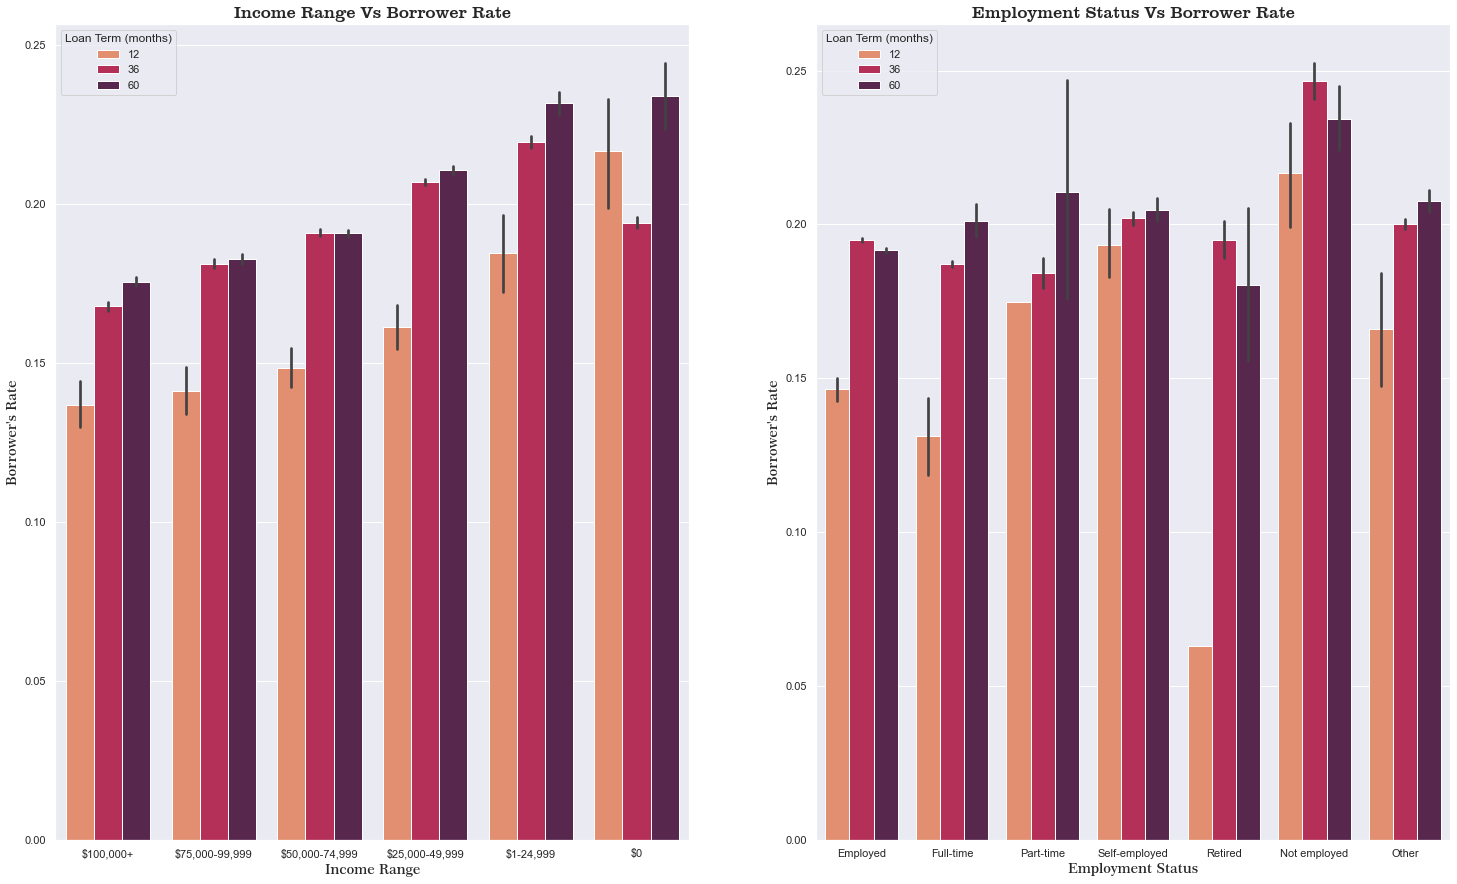

In [45]:
#setting the figure size
plt.figure(figsize=[25,15])

#relationship between income range, interest rate and loan term
Barplt(plt.subplot(1,2,1), 'IncomeRange', 'BorrowerRate', 'Term', 'Income Range Vs Borrower Rate', 'Income Range', 'Borrower\'s Rate')
plt.legend(title='Loan Term (months)')

#relationship between employment status, interest rate and loan term
Barplt(plt.subplot(1,2,2), 'EmploymentStatus', 'BorrowerRate', 'Term', 'Employment Status Vs Borrower Rate', 'Employment Status', 'Borrower\'s Rate')
plt.legend(title='Loan Term (months)');

There's a general trend of Borrower's Interest rate going up with lowering income range and increasing loan term. The highest Interest rate belong to those in the \\$0 income range and 60 months or 5 year loan period. The lowest interest rate belong to those earning more than $100,000 with a 12 month or 1 year loan period.
In terms of employment status, those that are retired and are taking a 12 month or 1 year loan have the least interest while those that are not employed have the highest interest rate with those taking a 36 month or 3 year loan having the highest interest rate. Individuals that are Employed and full time generally had less interest rate.

In [46]:
#creating a function to plot heatmap in pairs
def Heatmapplt(subplot, x, y, z, title, xlabel, ylabel):
    '''This function plots heatmap in pairs'''
    subplot

    #group the data according to z column's mean using the x and y column
    plot_df = loan_clean.groupby([x, y])[z].agg(np.mean)

    #reset index and create a pivot table
    plot_df = plot_df.reset_index().pivot(index=x, columns=y, values=z)

    #plot the heatmap
    sns.heatmap(plot_df, annot = True, fmt ='.3f', cmap = 'rocket_r')

    #display graph labels
    plt.title(title, fontdict=title_font)
    plt.xlabel(xlabel, fontdict=label_font)
    plt.ylabel(ylabel, fontdict=label_font)



### How does employment status and prosper ratings affect the interest rate of the individuals taking a loan?
Some group of people might be at a disadvantage when taking a loan. I would like to further explore that

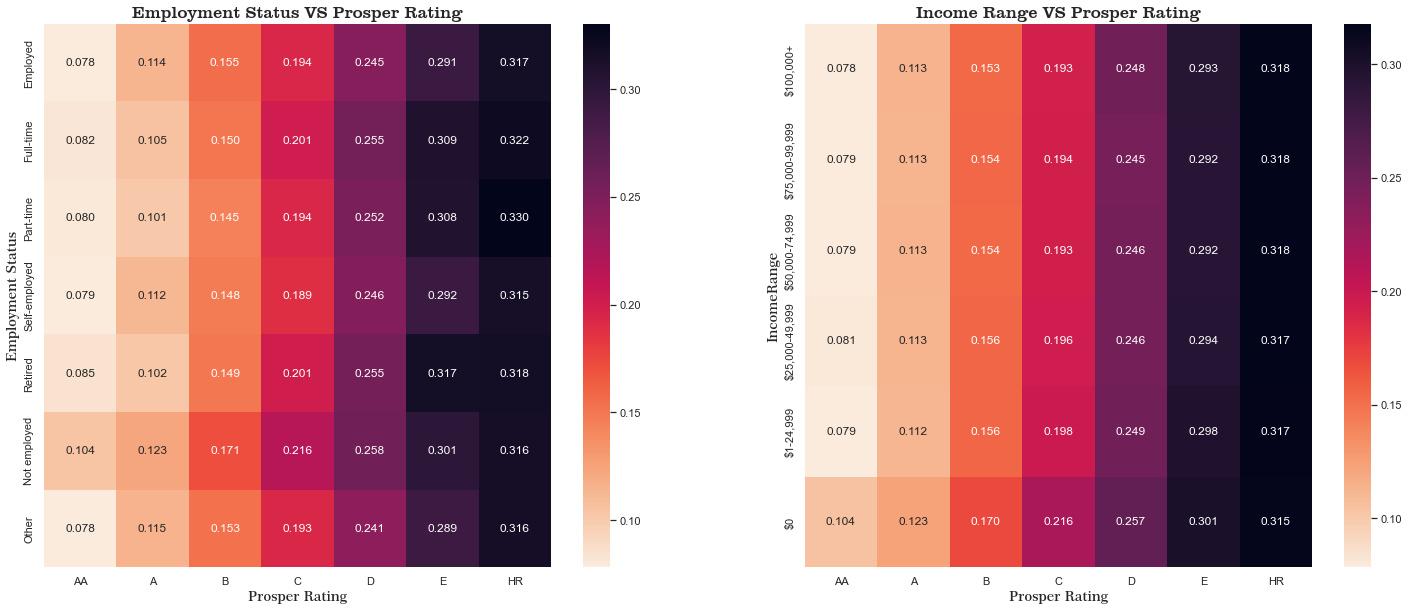

In [47]:
#setting the figure size
plt.figure(figsize=[25,10])

#heatmap showing the relationship between employment status, prosper rating and the borrower's interest rate
Heatmapplt(plt.subplot(1,2,1), 'EmploymentStatus', 'ProsperRating', 'BorrowerRate', 'Employment Status VS Prosper Rating', 'Prosper Rating', 'Employment Status')

#heatmap showing the relationship between income range, prosper rating and the borrower's interest rate
Heatmapplt(plt.subplot(1,2,2), 'IncomeRange', 'ProsperRating', 'BorrowerRate', 'Income Range VS Prosper Rating', 'Prosper Rating', 'IncomeRange')

From both graphs, it is evident that the higher the risk, the higher the interest rate, irrespective of the employment status or income range of the individual. There are points that slightly stand out. Individuals that are not employed tend to have higher interest rate across all the ratings and so do individuals in the $0 income range. Also retired individuals with 'E' ratings tend to get higher interest rate than other employment status with 'E' rating

### How does income range affect the loan amount and monthly loan repayment?
Is it true that those with higher income range may have less monthly lan repayment than others?

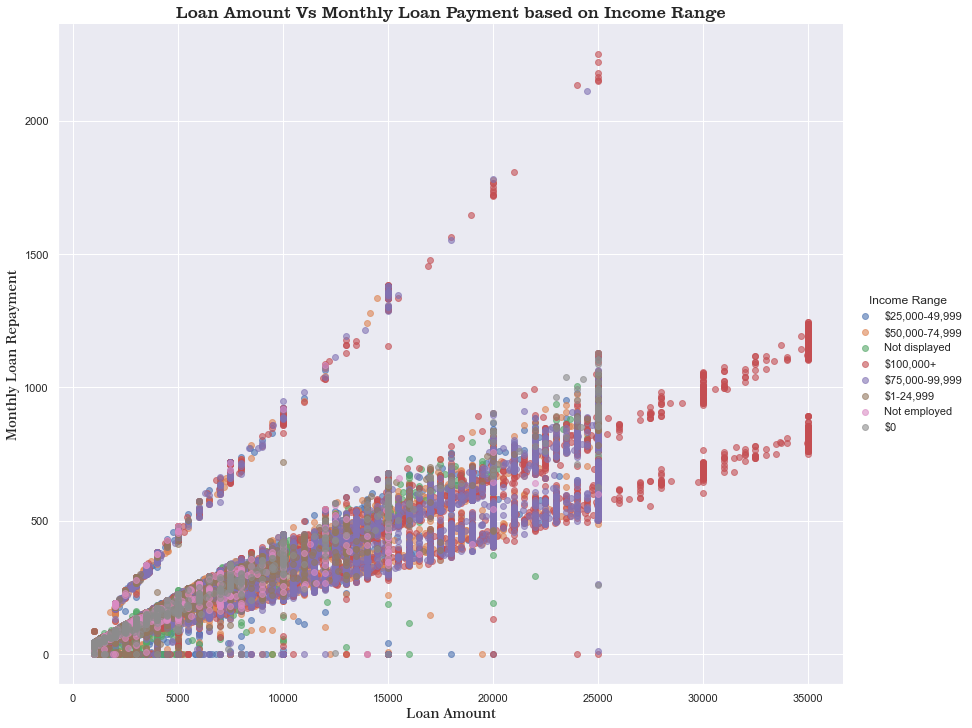

In [48]:
#create a facet grid to accommodate the graph and legend 
g = sns.FacetGrid(data = loan, aspect=1.2, height=10, hue='IncomeRange')

#plot scattergraph
g = g.map(sns.regplot, 'LoanOriginalAmount', 'MonthlyLoanPayment', scatter_kws={'alpha':0.6}, fit_reg=False, x_jitter=0.3)

#display graph labels
g.add_legend(title='Income Range')
plt.title('Loan Amount Vs Monthly Loan Payment based on Income Range', fontdict=title_font)
plt.xlabel('Loan Amount', fontdict=label_font)
plt.ylabel('Monthly Loan Repayment', fontdict=label_font);

As seen previously, it is confirmed that higher income individuals have access to higher loan amounts. There is a positive correlation between the loan amount and the monthly loan payment. This means the higher the loan amount, the higher the monthly loan payment. It is'nt a perfect correlation but there is still a positive correlation. 

### Do individuals with higher ratings have less interest and more loan amount?
Everything may be decided on the ratings that prosper give an individual. I would explore that relationship to see if there is any correlation.

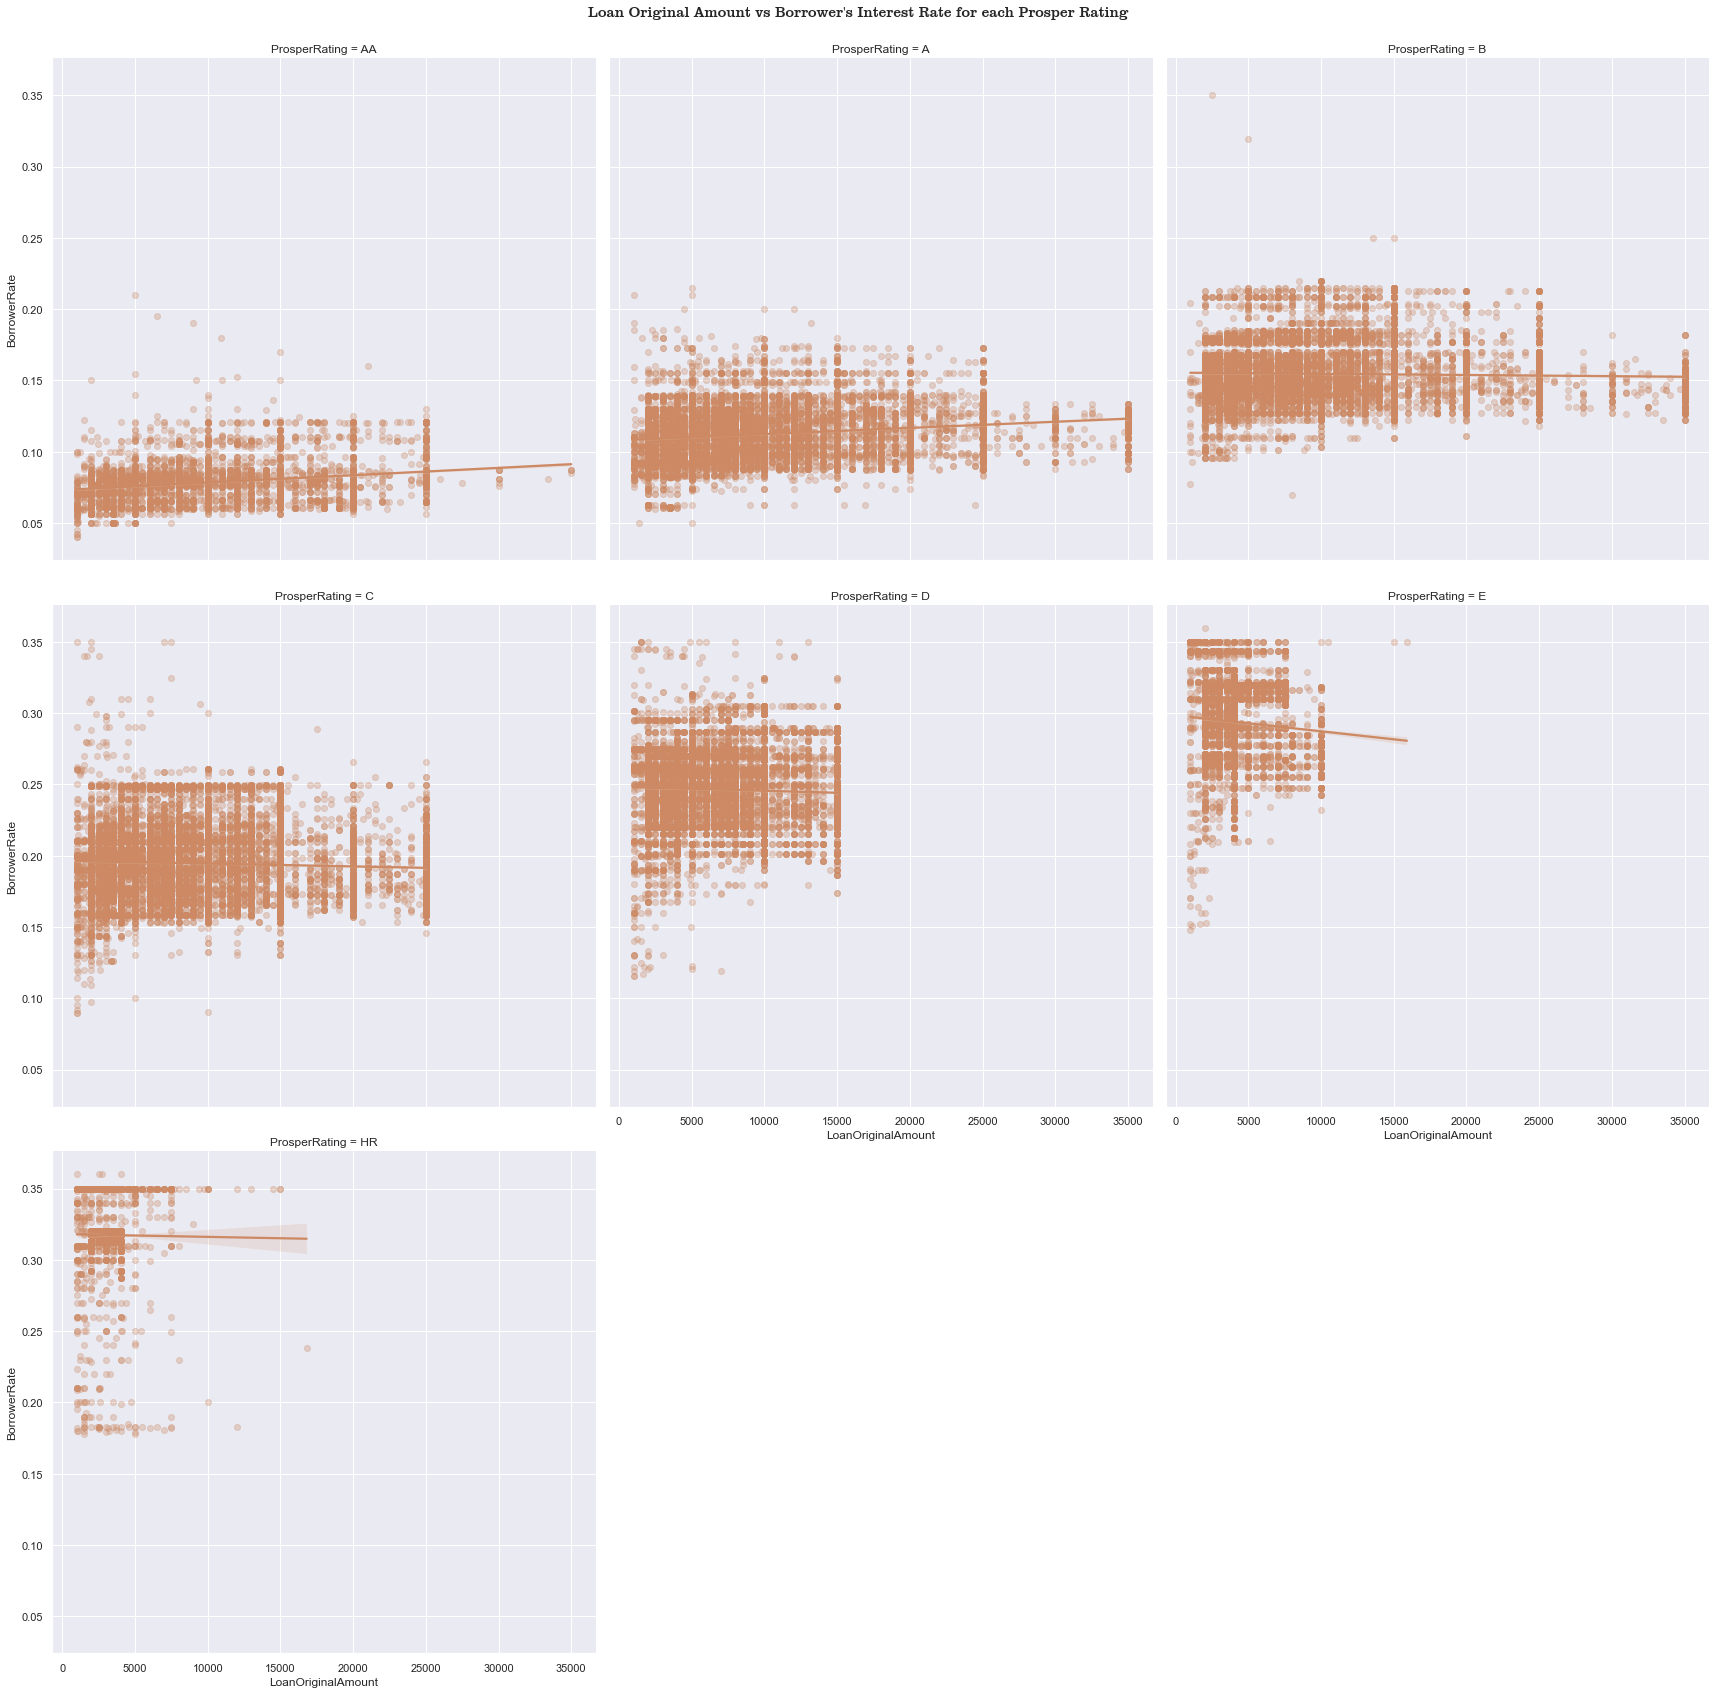

In [49]:
#create a facet grid to accommodate the graph and legend 
g= sns.FacetGrid(data=loan_clean, col='ProsperRating', col_wrap=3, height=8)

#plot scatter graph
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerRate', scatter_kws={'alpha': 0.3}, color = plt_color, x_jitter = 0.3)

#display graph labels
plt.suptitle('Loan Original Amount vs Borrower\'s Interest Rate for each Prosper Rating', fontdict=title_font)
plt.subplots_adjust(top=0.95);


Interest rate goes up as rating increases, this is evident in the rising points as the graphs progress. There is also a reduction in the loan amount as the risk increases, this is evident in the shrinkage of points towards the left. 

### Does the employment status of individuals with an impact on the interest and loan amount they get? 
Unemployed people may be at a disadvantage when it comes to loan amount and interest rate

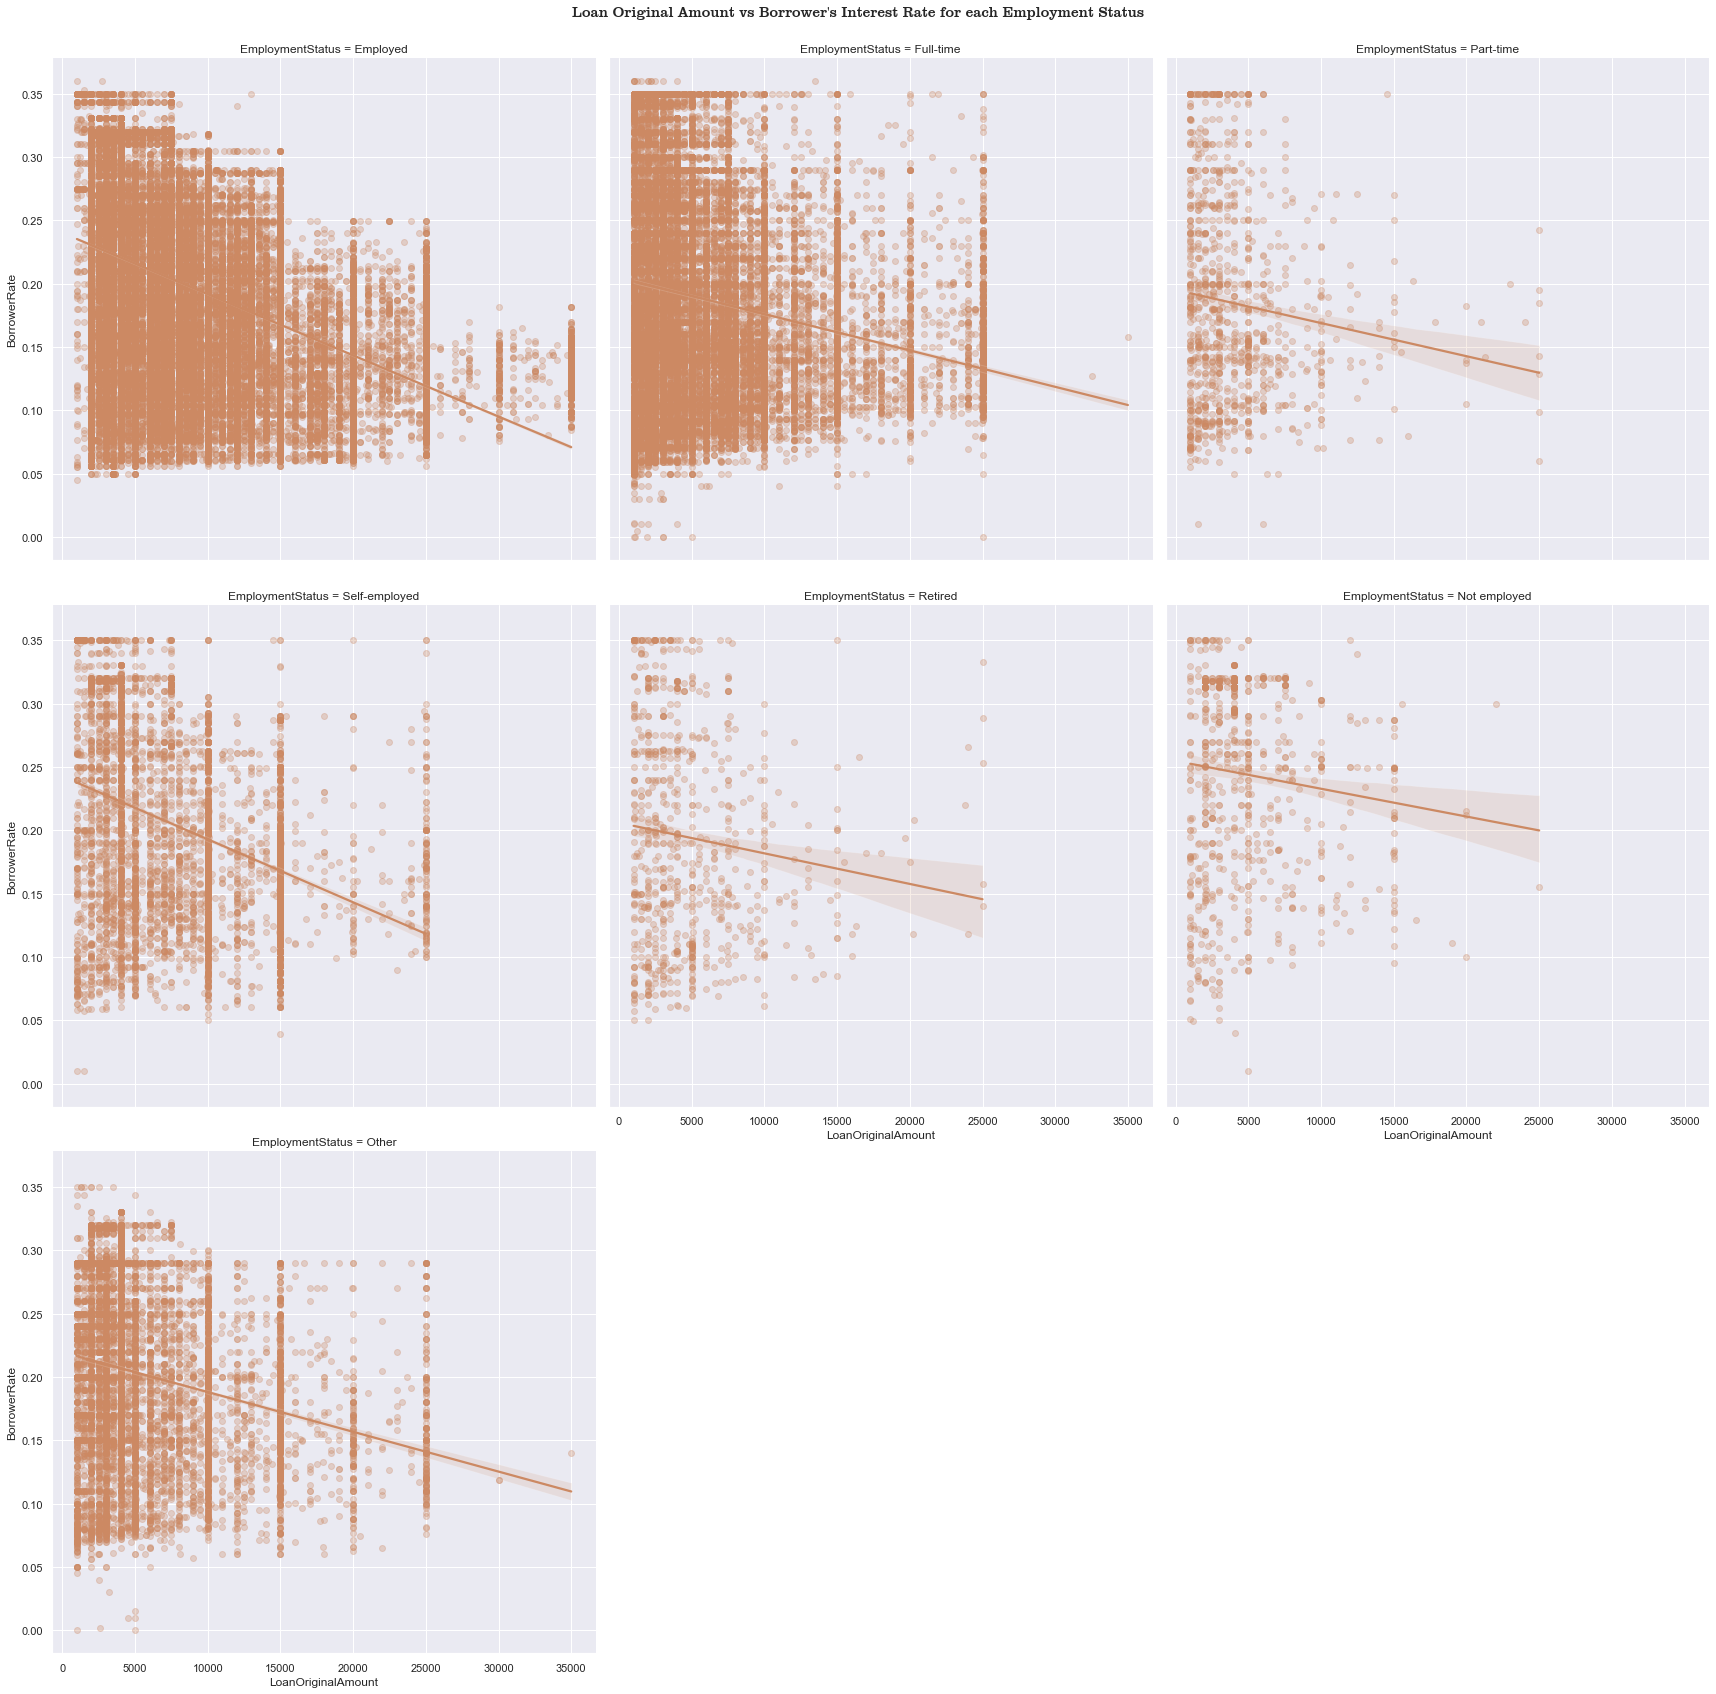

In [50]:
#create a facet grid to accommodate the graph and legend 
g= sns.FacetGrid(data=loan_clean, col='EmploymentStatus', col_wrap=3, height=8)

#plot scatter graph
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerRate', scatter_kws =  {'alpha':0.3}, color=plt_color, x_jitter=0.3)

#display graph labels
plt.suptitle('Loan Original Amount vs Borrower\'s Interest Rate for each Employment Status', fontdict=title_font)
plt.subplots_adjust(top=0.95);

The concentration of points in the employed employment status would suggest that an individual is more likely to get loans if they are employed. There's no significant reduction in loan amount except the retired and not employed employment status that have significantly less points towards the right. This means that an individual is less likely to get higher loan amount if they are retired or not employed

### What is the relationship between borrower's interest rate, loan original amount, monthly loan payment, debt to income ratio, prosper rating and stated monthly income?
There might be correlation between some numerical values in the dataset. It is time to explore that relationship

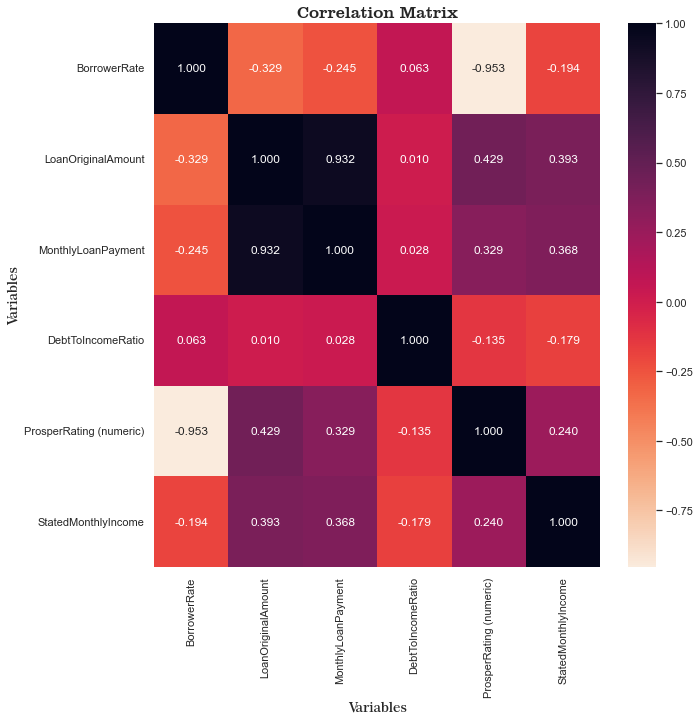

In [51]:
#define the variables to be used
vars=loan_clean[['BorrowerRate', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'DebtToIncomeRatio', 'ProsperRating (numeric)', 'StatedMonthlyIncome']]

#set figure size
plt.figure(figsize=[10,10])

#plot heatmap
sns.heatmap(vars.corr(), annot = True, fmt = '.3f', cmap='rocket_r')

#display graph labels
plt.title('Correlation Matrix', fontdict=title_font)
plt.xlabel('Variables', fontdict=label_font)
plt.ylabel('Variables', fontdict=label_font);

The relationship between all the variables seem to be insignificant with the exception of monthly loan payment and loan original amount which has a significant positive correlation. There is also a slight relationship between loan original amount and prosper rating which would suggest that the amount of loan available to individuals is slightly based on their prosper rating.

To see the relationships clearly, Ive plotted a pair grid of all the variables

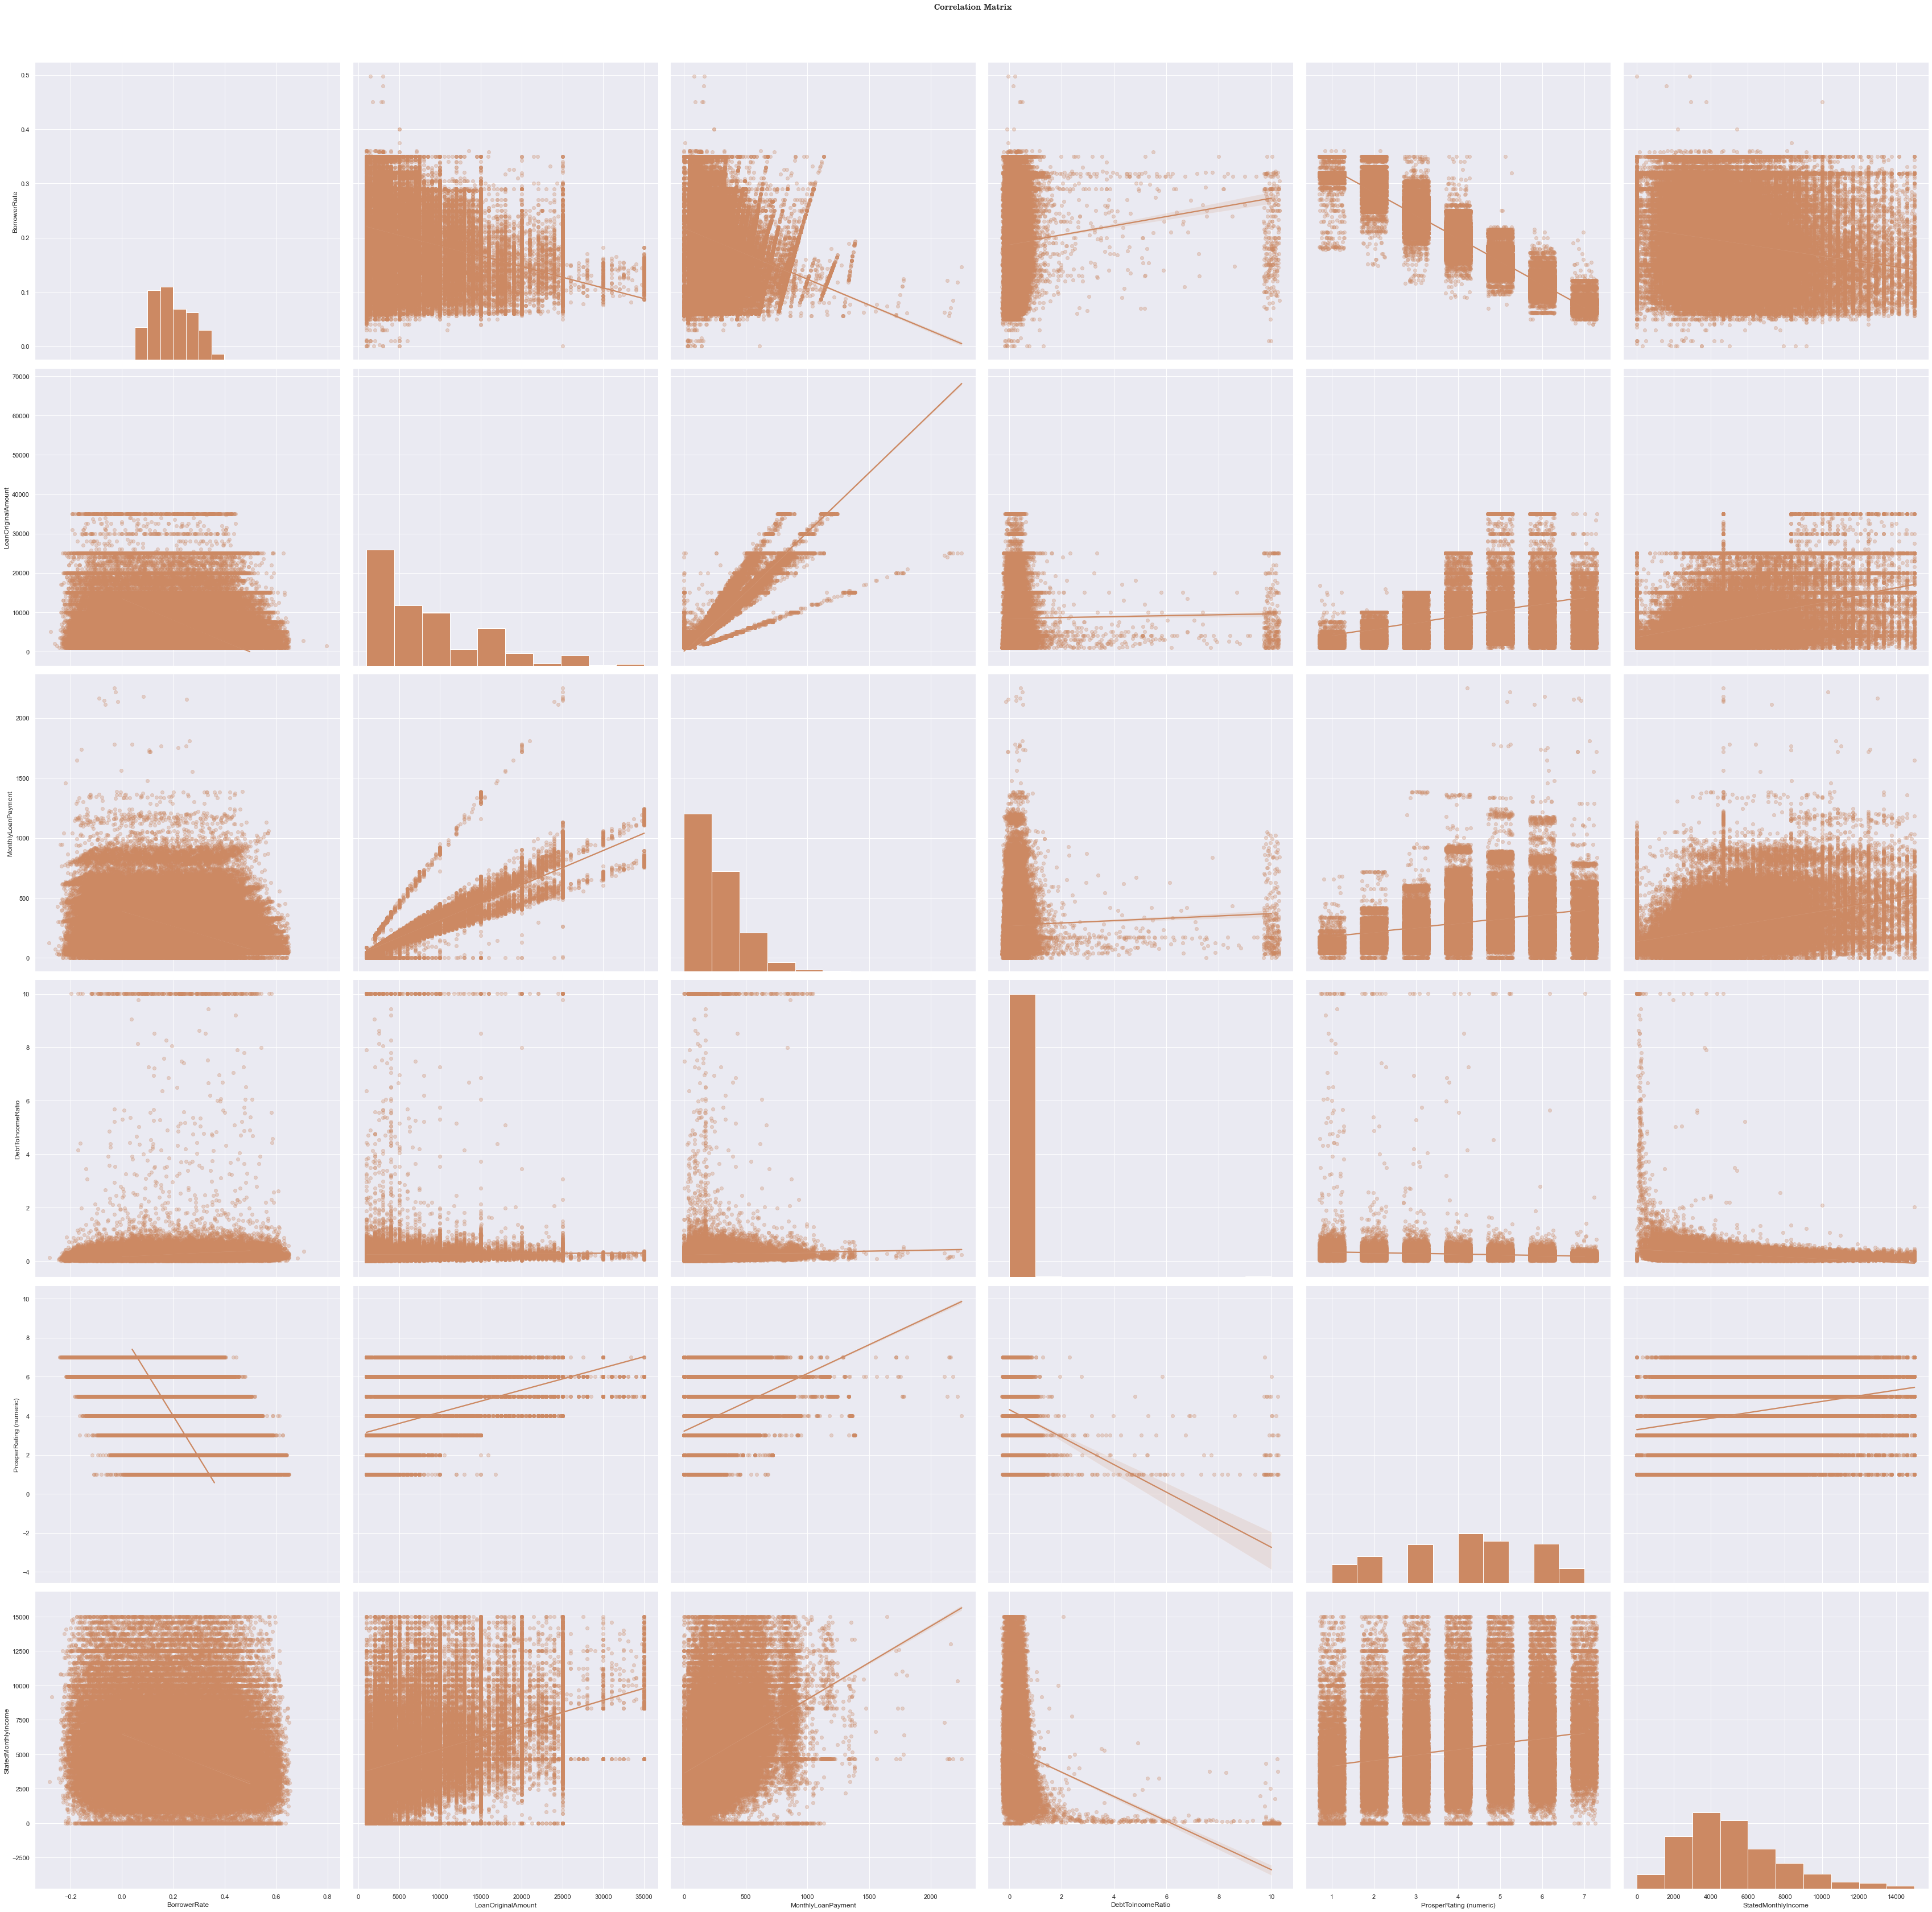

In [52]:
#create a pair grid to hold all graphs
g=sns.PairGrid(data=loan_clean, vars=['BorrowerRate', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'DebtToIncomeRatio', 'ProsperRating (numeric)', 'StatedMonthlyIncome'], height = 8)

#histogram for all graphs on the diagonal axis
g.map_diag(plt.hist, color=plt_color)

#scatterplot for graphs not on the diagonal axis
g.map_offdiag(sns.regplot, scatter_kws =  {'alpha':0.3}, color=plt_color, x_jitter=0.3)

#display graph labels
plt.suptitle('Correlation Matrix', fontdict=title_font)
plt.subplots_adjust(top=0.95);

---

<a id="#conclusion"></a>
## Conclusions
I explored the Prosper loan dataset and got some useful insights from the visualization
> - 2013 had the highest number of loan collected by a very large margin. 2012 with the second highest number of loans collected had a difference of -13%
> - A majority of loans are still current while a lot are completed, defaulted or charged off
> - Most loans were taken by individuals within the \\$25,000-49,99 and \\$50,000-74,999 income range
> - Most loans had between 0 and 50 investors
> - In general, home owners have lower interest rate than those that don't own homes. 
> - There is a positive correlation between the loan amount and the monthly loan payment
> - Higher income individuals have access to higher loan amounts
The people with the most advantage are people that are employed, have a higher income range and access one year loans.


<a id="#limitations"></a>
## Limitations
Because of the number of variables of the dataset and the lack of defined business goals, understanding the data took a lot of time 

In [67]:
from collections import Counter

columns = [ 'BorrowerState', 'ListingCategory', 'LoanStatus', 'Investors', 'Term', 'EmploymentStatus', 
'ProsperRating', 'IncomeRange', 'IsBorrowerHomeowner',  'LoanOriginationDate', 'TotalProsperLoans',
'StatedMonthlyIncome', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'MonthlyLoanPayment', 'BorrowerRate', 
'LoanOriginalAmount', 'DebtToIncomeRatio', 'ProsperRating (numeric)']
loan_clean.to_csv('ProsperLoanDataCleaned.csv', index = False, columns = columns)
Counter(columns)

Counter({'BorrowerState': 1,
         'ListingCategory': 1,
         'LoanStatus': 1,
         'Investors': 1,
         'Term': 1,
         'EmploymentStatus': 1,
         'ProsperRating': 1,
         'IncomeRange': 1,
         'IsBorrowerHomeowner': 1,
         'LoanOriginationDate': 1,
         'TotalProsperLoans': 1,
         'StatedMonthlyIncome': 1,
         'CreditScoreRangeLower': 1,
         'CreditScoreRangeUpper': 1,
         'MonthlyLoanPayment': 1,
         'BorrowerRate': 1,
         'LoanOriginalAmount': 1,
         'DebtToIncomeRatio': 1,
         'ProsperRating (numeric)': 1})